# Исследование MyAdamW и AdamW

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd

## Загрузка данных

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
def get_mushrooms_dataset():
    dataset = "mushrooms.txt" 
    data = load_svmlight_file(dataset)
    X, y = data[0].toarray(), data[1]
    y = y*2 - 3
    return X, y

def get_wine_dataset():
    data = pd.read_csv('Wine.csv')
    data['color'] = data['color'].apply(lambda x: 1 if x == 'red' else -1)
    X = data.drop(columns='color').to_numpy()
    y = data['color'].to_numpy()
    X = np.array(X, dtype=np.float64)
    return X, y

def get_water_probability_dataset():
    data = pd.read_csv('water_potability.csv')
    data = data.dropna(axis=0)
    X = data.drop(columns='Potability').to_numpy()
    X = np.array(X, dtype=np.float64)
    y = data['Potability'].to_numpy()
    y = np.array(y, dtype=np.float64)
    y = y * 2 - 1
    return X, y

def get_diabete_dataset():
    data = pd.read_csv('diabetes.csv')
    data = data.dropna(axis=0)
    X = data.drop(columns='1').to_numpy()
    X = np.array(X, dtype=np.float64)
    y = data['1'].to_numpy()
    y = np.array(y, dtype=np.float64)
    y = y * 2 - 1
    return X, y

In [4]:
from importlib import reload
import lib
reload(lib)
from lib  import MyLogregression

In [5]:
def plot_models_acc_error(*args):
    _, ax = plt.subplots(2, 2, figsize=(14, 12))
    title = args[1]
    ax[0, 0].set_title(f"Логарифм ошибки от номера итерации ($error = || {title} ||$)")
    ax[0, 0].set_xlabel("Номер итерации")
    ax[0, 0].set_ylabel("Логарифм ошибки")
    
    ax[0, 1].set_title(f"Логарифм ошибки от времени ($error = || {title}||$)")
    ax[0, 1].set_xlabel("Время, с")
    ax[0, 1].set_ylabel("Логарифм ошибки")
    
    ax[1, 0].set_title("Точность от номера итерации")
    ax[1, 0].set_xlabel("Номер итерации")
    ax[1, 0].set_ylabel("Точность")
    
    ax[1, 1].set_title("Точность от времени")
    ax[1, 1].set_xlabel("Время, с")
    ax[1, 1].set_ylabel("Точность")
    for model in args[0]:

        y = np.array(model.get_errors())
        x = np.linspace(0, len(y), len(y))
        ax[0, 0].plot(x, np.log(y), label=model.get_name())
        x = np.array(model.get_time())
        ax[0, 1].plot(x, np.log(y), label=model.get_name())
        if (model.get_name()[0:5] == "AdamW" or model.get_name()[0:5] == "OASIS"):
            y = np.array(model._error_adamw)
            x = np.linspace(0, len(y), len(y))
            ax[0, 0].plot(x, np.log(y), label=model.get_name() + '_true')
            x = np.array(model.get_time())
            ax[0, 1].plot(x, np.log(y), label=model.get_name() + '_true')

        y = np.array(model.get_accuracy())
        x = np.linspace(0, len(y), len(y))
        ax[1, 0].plot(x, y, label=model.get_name())
        x = np.array(model.get_time())
        ax[1, 1].plot(x, y, label=model.get_name())


    legend_box = ax[1, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[1, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0, 0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")


def plot_models_acc_error2(*args):
    _, ax = plt.subplots(1, 2, figsize=(16, 9))
    title = args[1]
    ax[0].set_title(f"Error logarithm form iteration")
    ax[0].set_xlabel("Iteration")
    ax[0].set_ylabel("Error logarithm")
    
    ax[1].set_title("Accuracy from iteration")
    ax[1].set_xlabel("Iteration")
    ax[1].set_ylabel("Accuracy")

    for model in args[0]:

        if (model.get_name()[0:5] == "AdamW" or model.get_name()[0:5] == "OASIS"):
            y = np.array(model.get_errors())
            x = np.linspace(0, len(y), len(y))
            ax[0].plot(x, np.log(y), label=model.get_name() + '[$\\nabla f + \\nabla r$]')
            
            y = np.array(model._error_adamw)
            x = np.linspace(0, len(y), len(y))
            ax[0].plot(x, np.log(y), label=model.get_name() + '[$\\nabla f + \\nabla r D_t$]')
        elif (model.get_name()[0:6] == "AdamL2"):
            y = np.array(model.get_errors())
            x = np.linspace(0, len(y), len(y))
            ax[0].plot(x, np.log(y), label=model.get_name() + '[$\\nabla f + \\nabla r$]')
        else:
            y = np.array(model.get_errors())
            x = np.linspace(0, len(y), len(y))
            ax[0].plot(x, np.log(y), label=model.get_name() + '[$\\nabla f$]')

        y = np.array(model.get_accuracy())
        x = np.linspace(0, len(y), len(y))
        ax[1].plot(x, y, label=model.get_name())
        
    legend_box = ax[1].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

    legend_box = ax[0].legend(framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")

### Models

In [6]:
def get_gd_models(X_train, y_train, X_test, y_test, \
                  learning_rates=[0.1, 0.05, 0.005], weight_decays=[0.1, 0.05, 0.005], iter=1000):
    gd_models = []
    for lr in learning_rates:
        GD = MyLogregression(iter=iter, lr_func=lambda w: lr, name="GD", label=f"GD(lr={lr})")
        GD.fit(X_train, y_train, X_test, y_test)
        gd_models.append(GD)
    return gd_models

def get_adamw_models(X_train, y_train, X_test, y_test, \
                    learning_rates=[0.1, 0.05, 0.01], weight_decays=[0.1, 0.05, 0.005], iter=1000):
    adamw_models = []
    
    for lr in learning_rates:
        for wd in weight_decays:
            AdamW = MyLogregression(iter=iter, lr_func=lambda w: lr, name="AdamW", label=f"AdamW(lr={lr}, wd={wd})", betas=[0.99, 0.999], l2_coef=wd)
            AdamW.fit(X_train, y_train, X_test, y_test)    
            adamw_models.append(AdamW)
    return adamw_models

def get_adaml2_models(X_train, y_train, X_test, y_test, \
                      learning_rates=[0.1, 0.05, 0.01], weight_decays=[0.1, 0.05, 0.005], iter=1000):
    adaml2_models = []
    for lr in learning_rates:
        for wd in weight_decays:
            Adaml2 = MyLogregression(iter=iter, lr_func=lambda w: lr, name="AdamL2", label=f"AdamL2(lr={lr}, wd={wd})", betas=[0.99, 0.999], l2_coef=wd)
            Adaml2.fit(X_train, y_train, X_test, y_test)    
            adaml2_models.append(Adaml2)
    return adaml2_models

def get_oasis_models(X_train, y_train, X_test, y_test, \
                    learning_rates=[0.1, 0.05, 0.01], weight_decays=[0.1, 0.05, 0.005], iter=1000):
    oasis_models = []
    for lr in learning_rates:
        for wd in weight_decays:
            OASIS = MyLogregression(iter=iter, lr_func=lambda w: lr, name="OASIS", label=f"OASIS(lr={lr},wd={wd})", betas=[0.99, 0.999], l2_coef=wd)
            OASIS.fit(X_train, y_train, X_test, y_test)    
            oasis_models.append(OASIS)
    return oasis_models

def get_adamwh_models(X_train, y_train, X_test, y_test, \
                      learning_rates=[0.1, 0.05, 0.01], weight_decays=[0.1, 0.05, 0.005], iter=1000):
    adamwh_models = []
    for lr in learning_rates:
        for wd in weight_decays:
            AdamWH = MyLogregression(iter=iter, lr_func=lambda w: lr, name="AdamWH", label=f"AdamWH(lr={lr}, wd={wd})", betas=[0.99, 0.999], l2_coef=wd)
            AdamWH.fit(X_train, y_train, X_test, y_test)    
            adamwh_models.append(AdamWH)
    return adamwh_models

In [8]:
from sklearn import preprocessing
def func_for_all(X, y, learning_rates, weight_decays, iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    
    adamwh_models = get_adamwh_models(X_train, y_train, X_test, y_test, \
                                     learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)
    
    gd_models = get_gd_models(X_train, y_train, X_test, y_test, \
                              learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)
    adamw_models = get_adamw_models(X_train, y_train, X_test, y_test, \
                                    learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)
    adaml2_models = get_adaml2_models(X_train, y_train, X_test, y_test, \
                                      learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)
    oasis_models = get_oasis_models(X_train, y_train, X_test, y_test, \
                                     learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)
    
    return [gd_models, adamw_models, adaml2_models, oasis_models, adamwh_models]


## Mushrooms

In [8]:
X_mush, y_mush = get_mushrooms_dataset()
learning_rates = [0.1, 0.05, 0.01]
weight_decays = [0.1, 0.05, 0.005]
iter = 2000
mush_models = func_for_all(X_mush, y_mush, learning_rates=learning_rates, weight_decays=weight_decays, iter=2000)

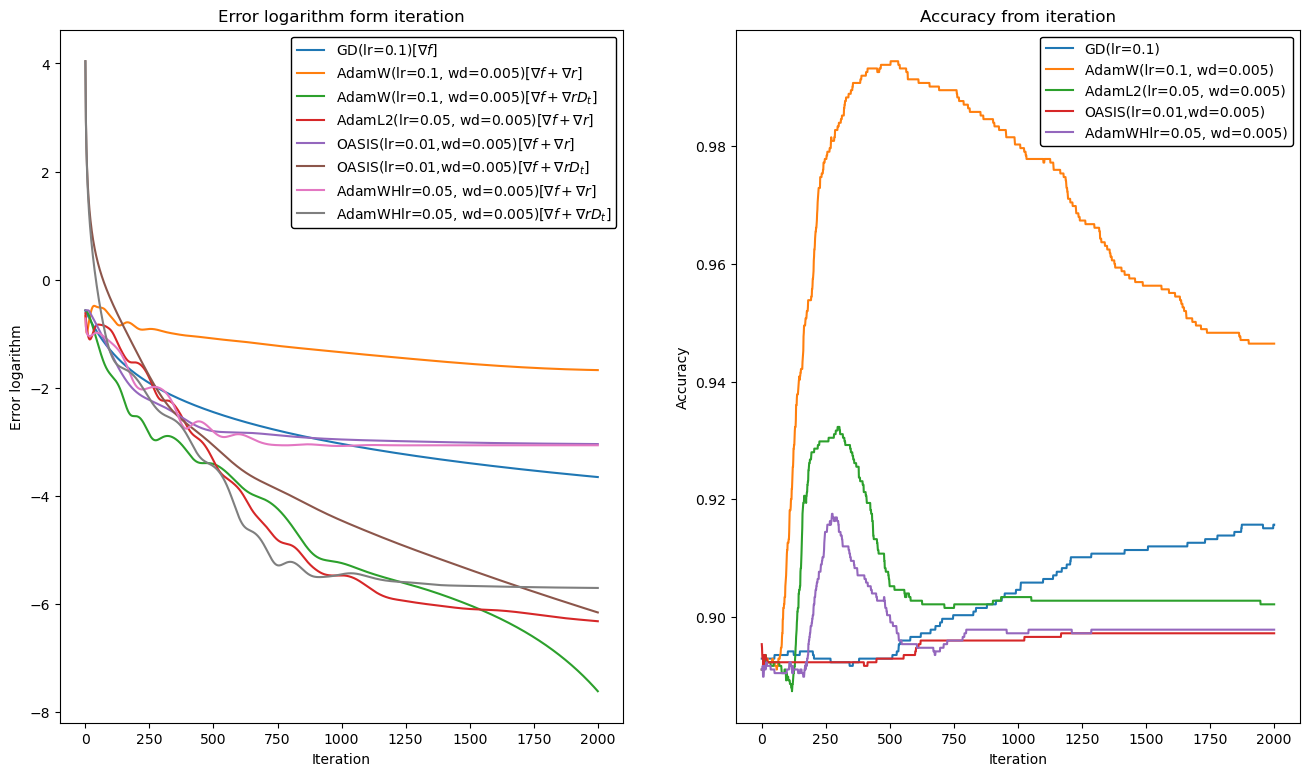

In [22]:
best_models = [mush_models[0][0], mush_models[1][2], mush_models[2][5], mush_models[3][-1], mush_models[4][5]]
plot_models_acc_error2(best_models, '')

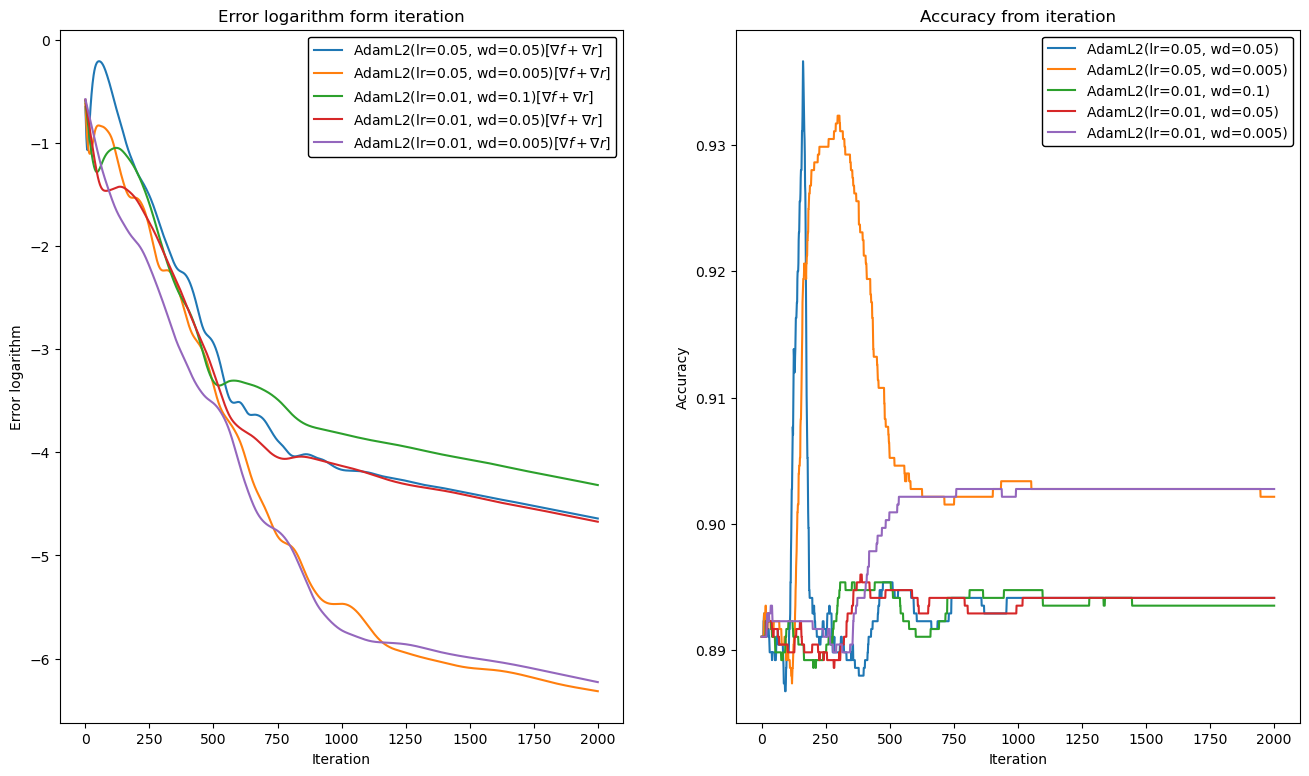

In [29]:
plot_models_acc_error2(mush_models[2][2:] and mush_models[2][4:], '')

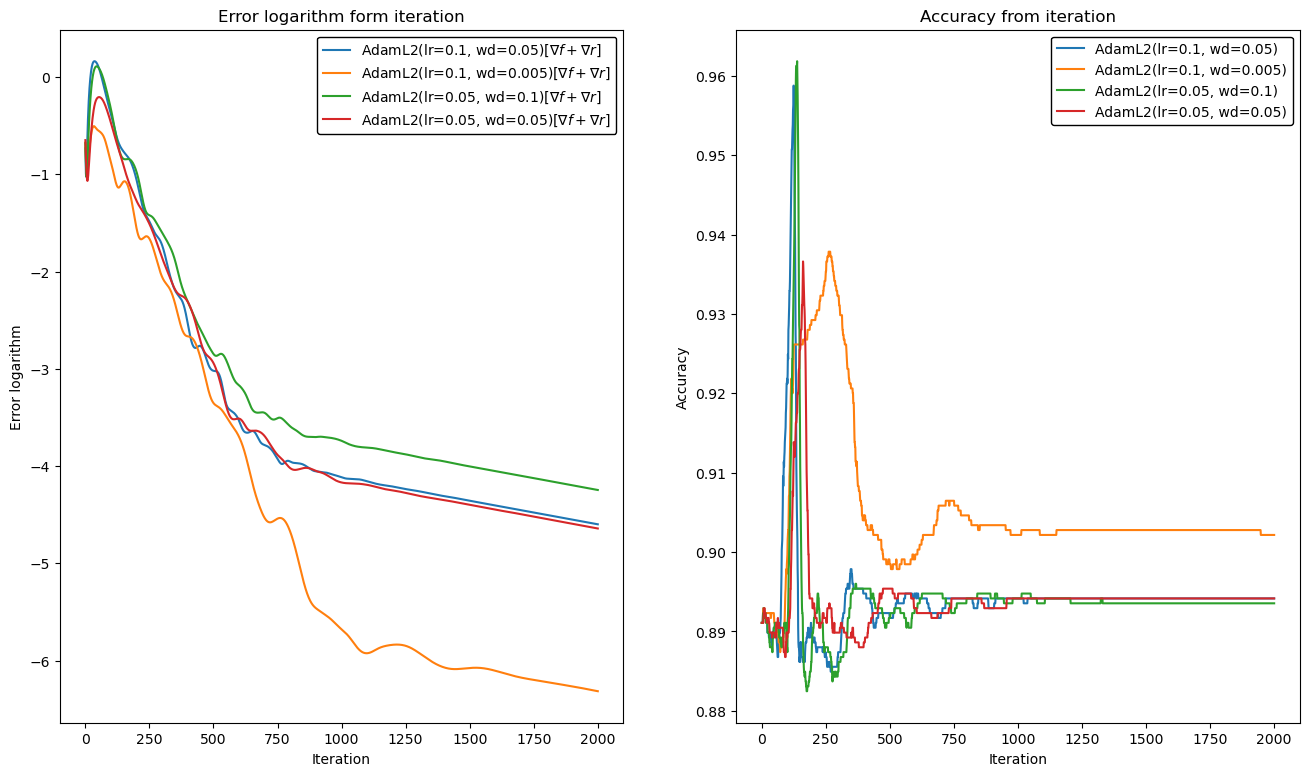

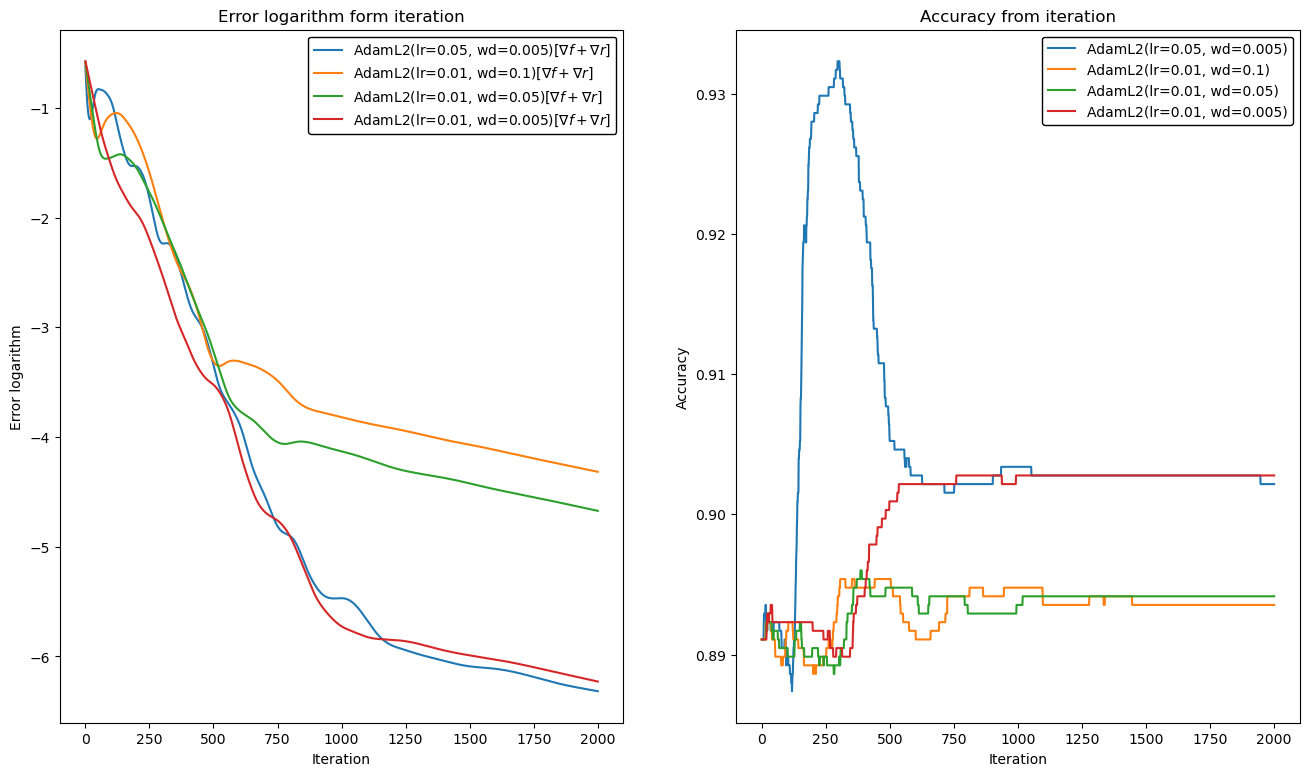

In [37]:
plot_models_acc_error2(mush_models[2][1:5], "")
plot_models_acc_error2(mush_models[2][5:], "")

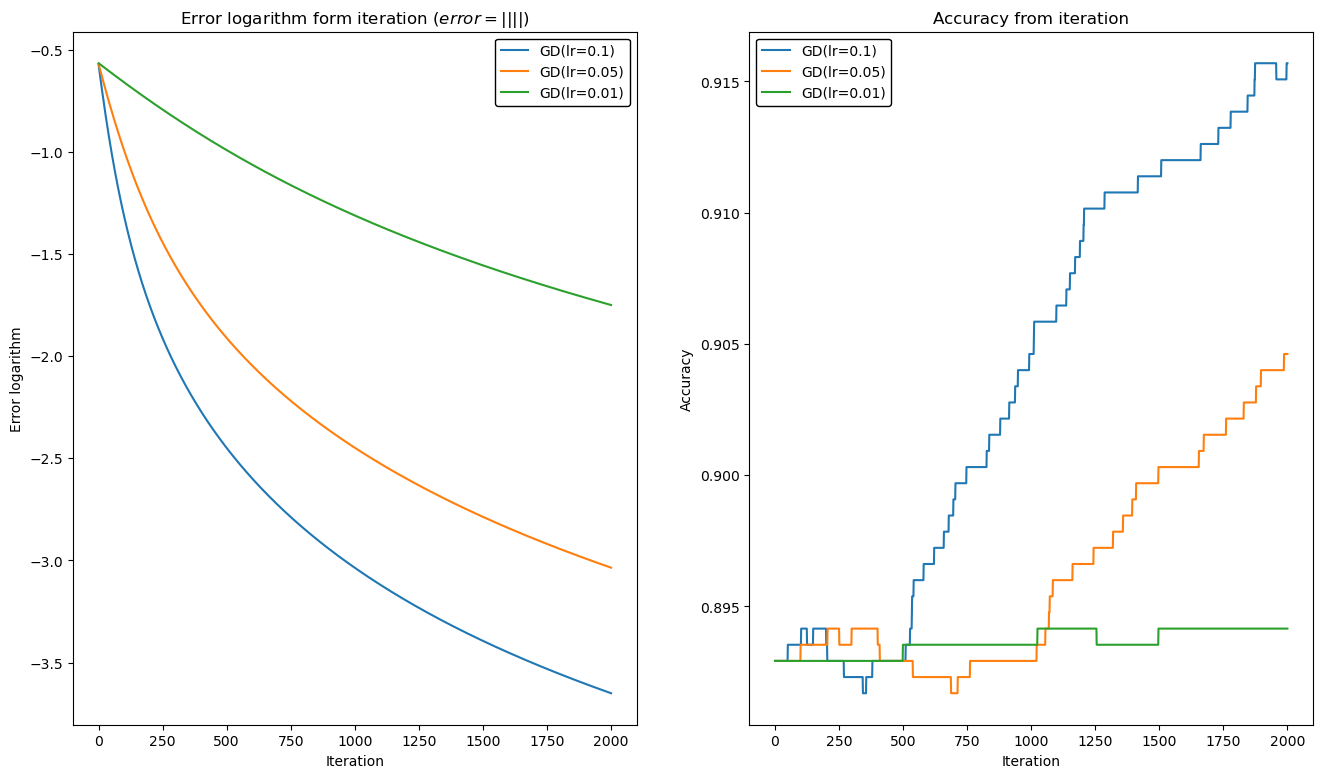

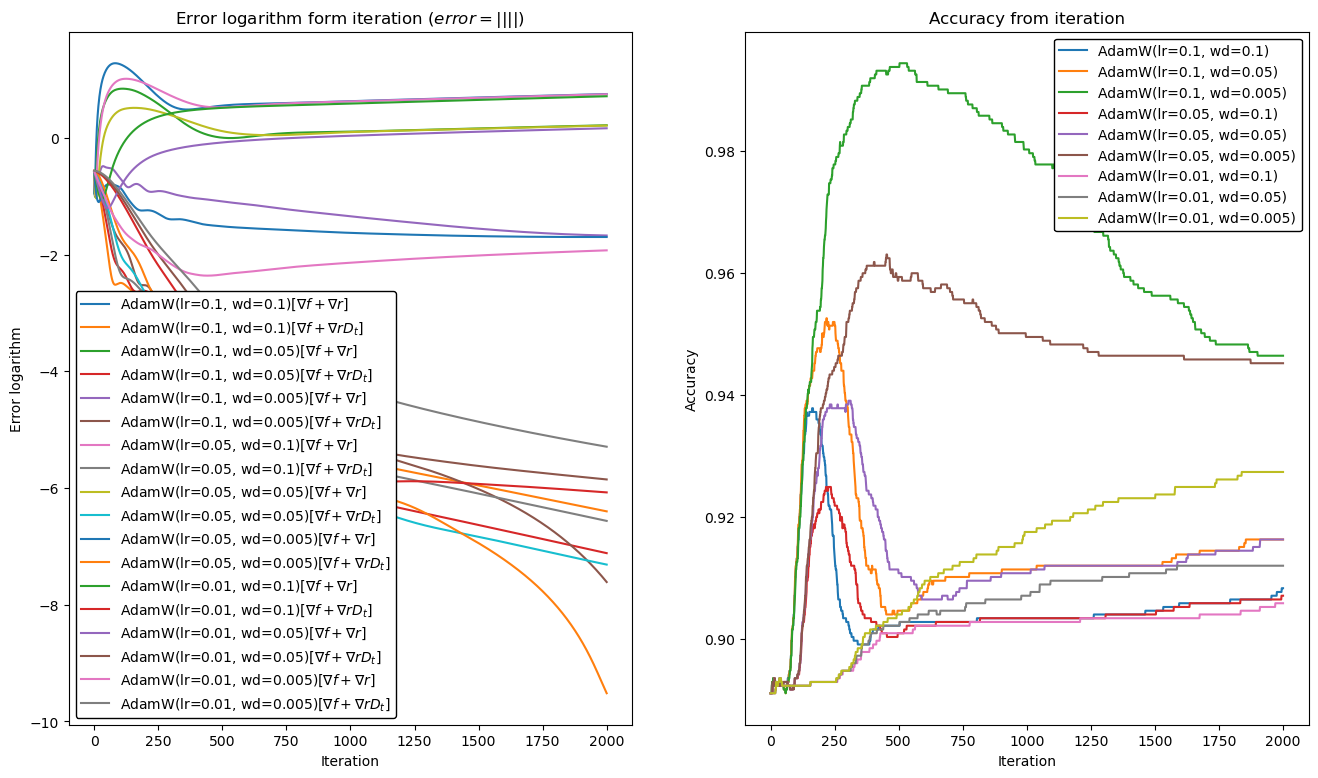

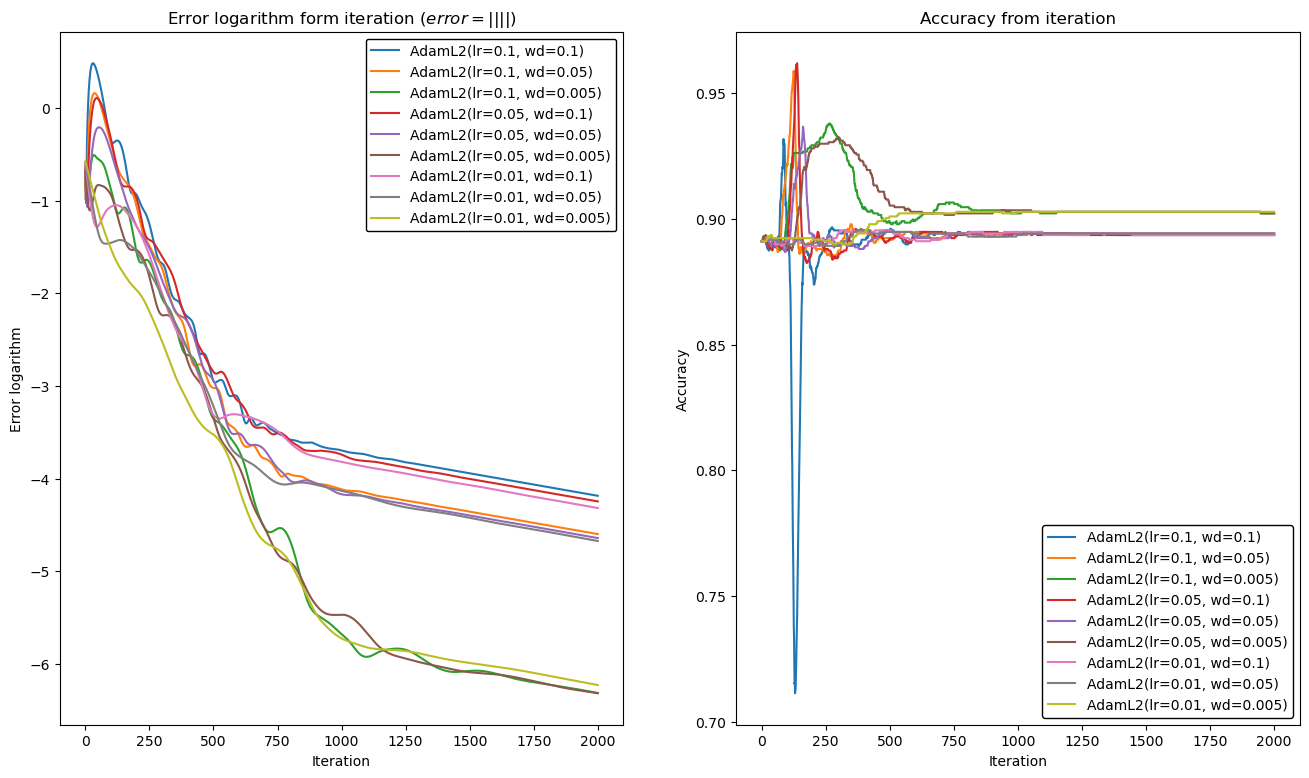

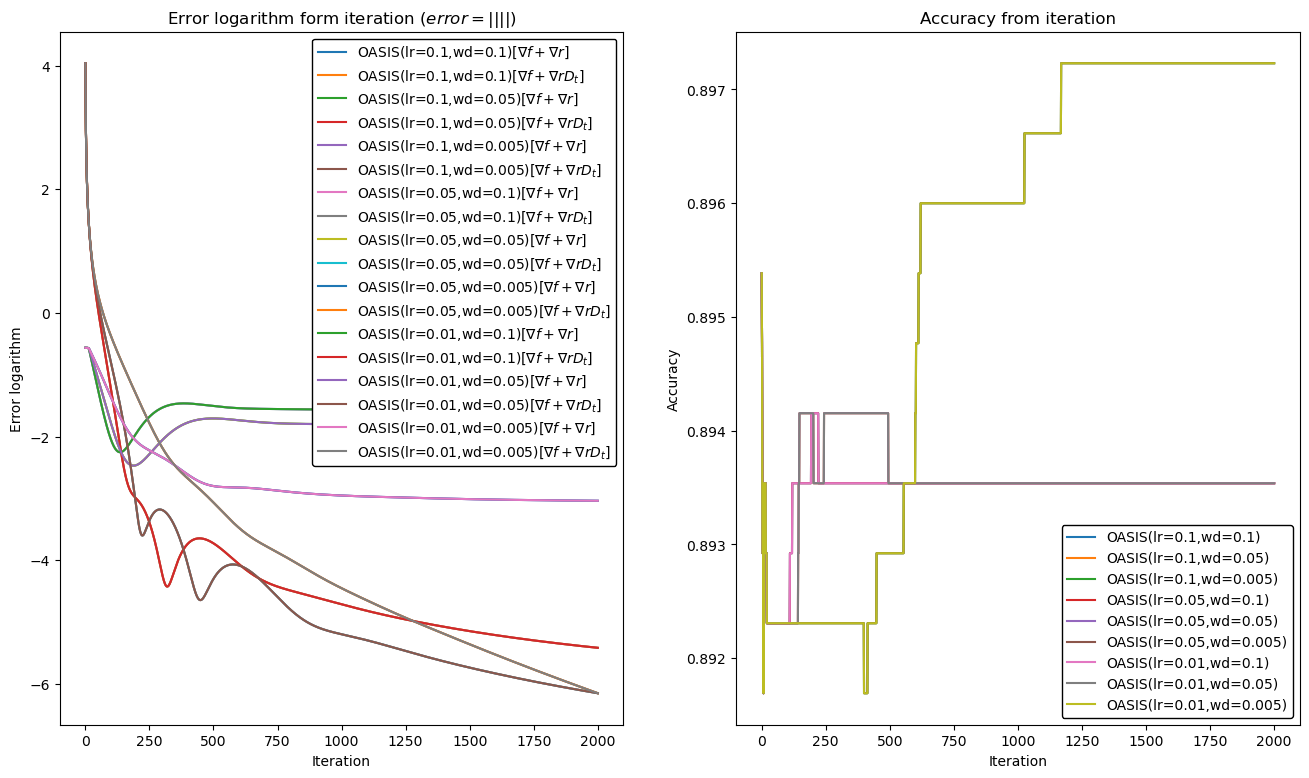

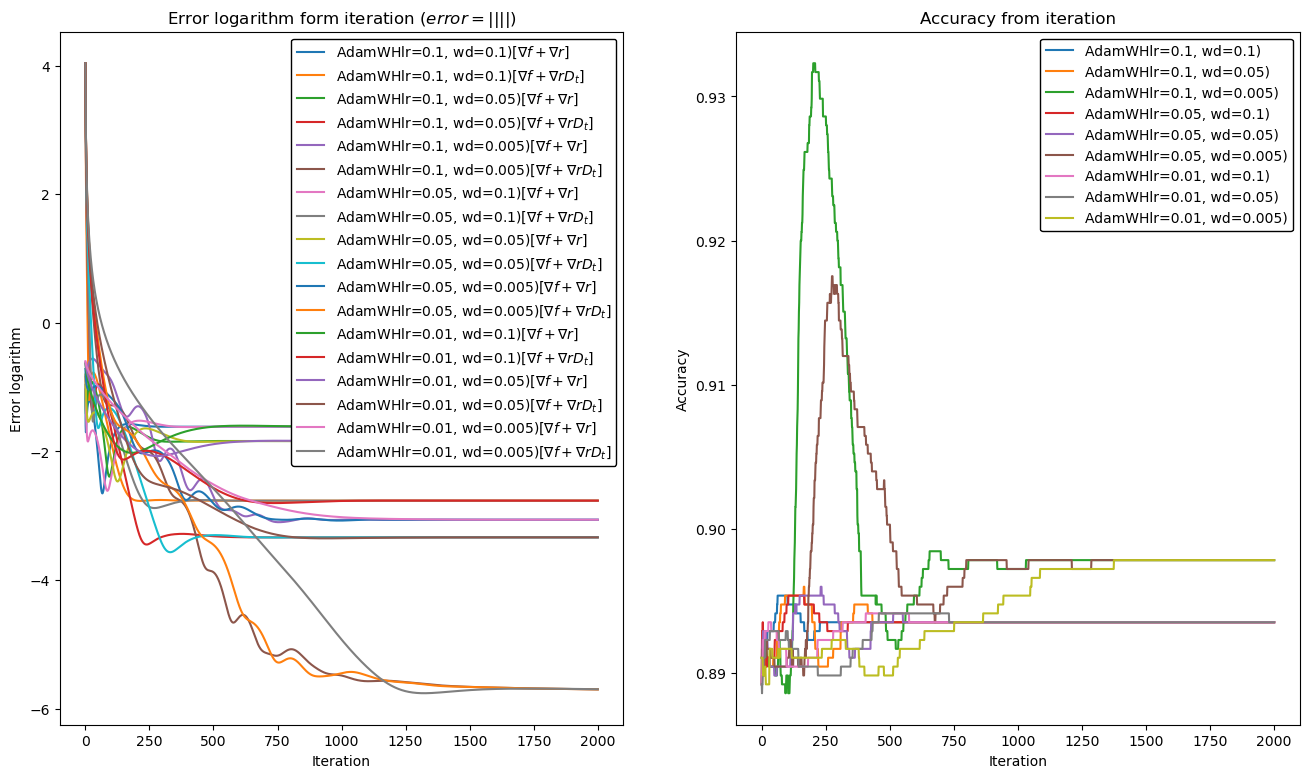

In [9]:
for model in mush_models:
    plot_models_acc_error2(model, "")

## Wine

In [8]:
X_wine, y_wine = get_wine_dataset()
learning_rates = [0.1, 0.05, 0.01]
weight_decays = [0.1, 0.05, 0.005]
iter = 2000
wine_models = func_for_all(X_wine, y_wine, learning_rates=learning_rates, weight_decays=weight_decays, iter=2000)

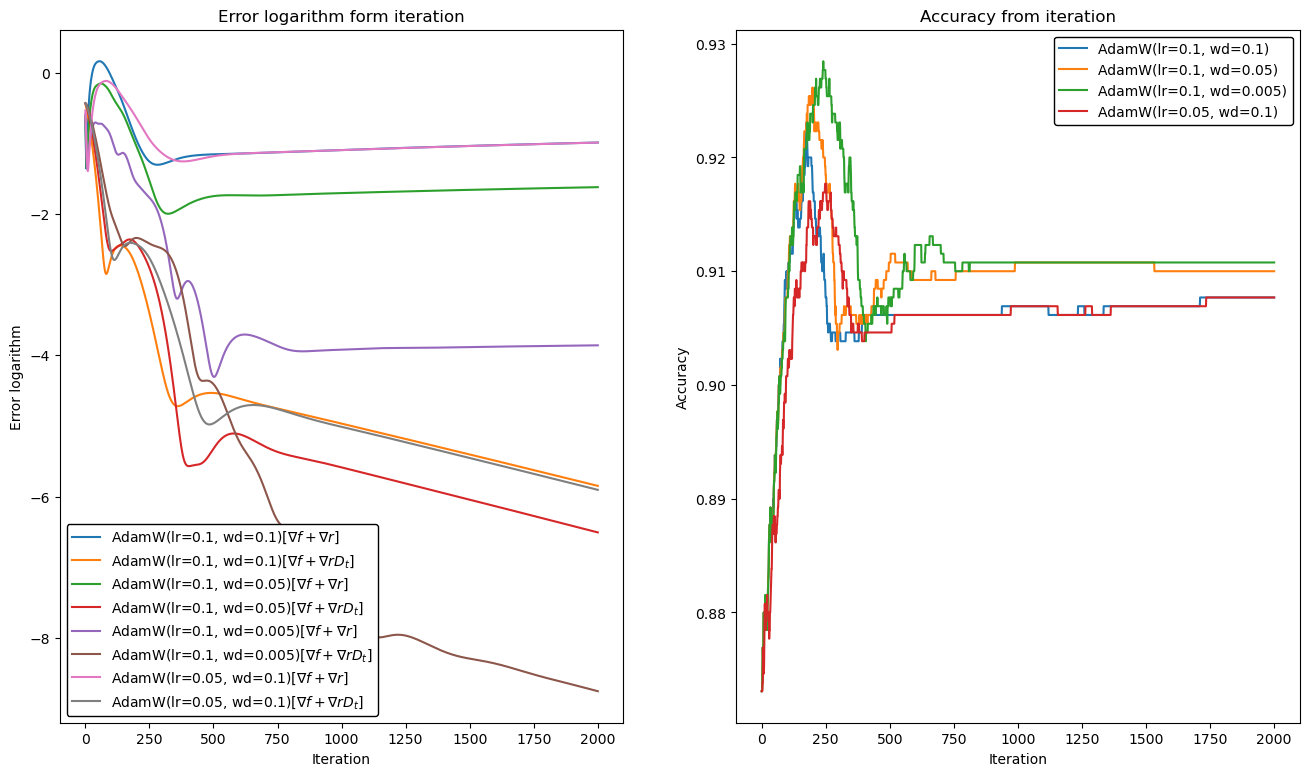

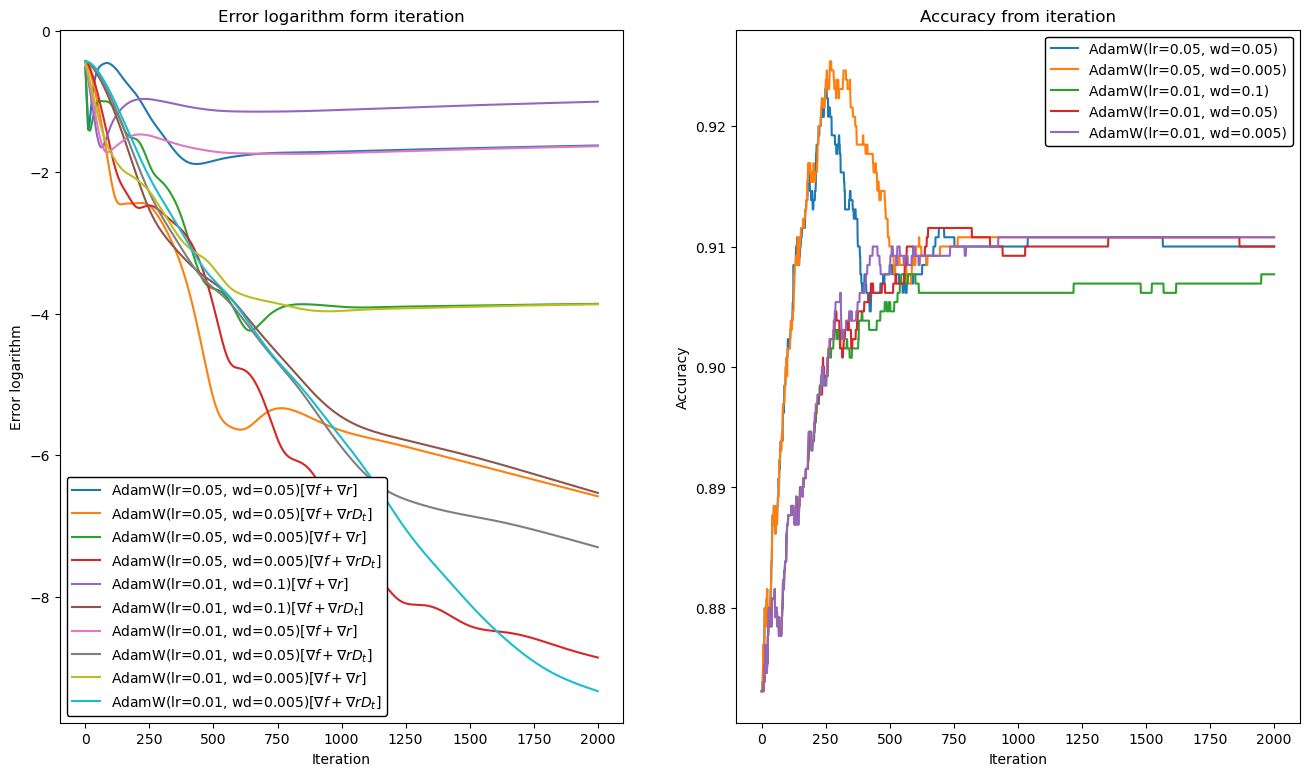

In [13]:
plot_models_acc_error2(wine_models[1][0:4], "")
plot_models_acc_error2(wine_models[1][4:], "")

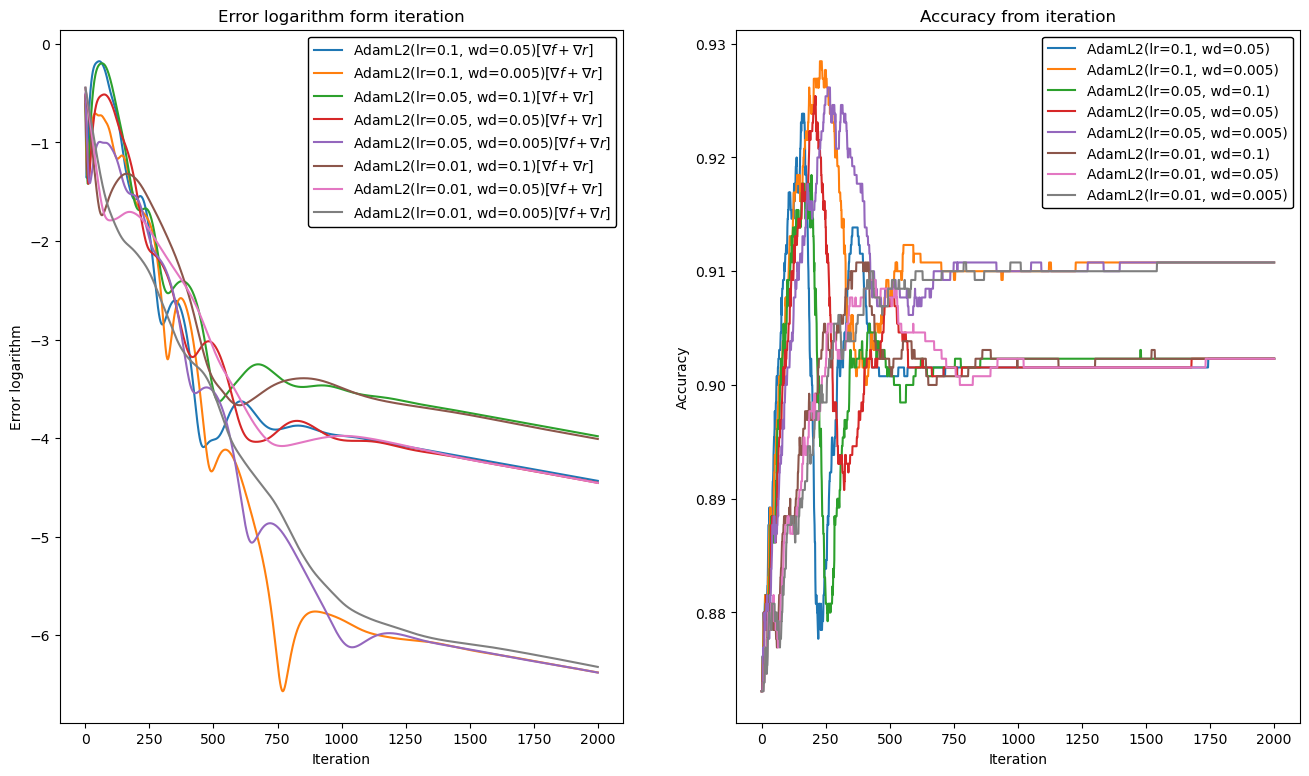

In [21]:
plot_models_acc_error2(wine_models[2][1:], "")

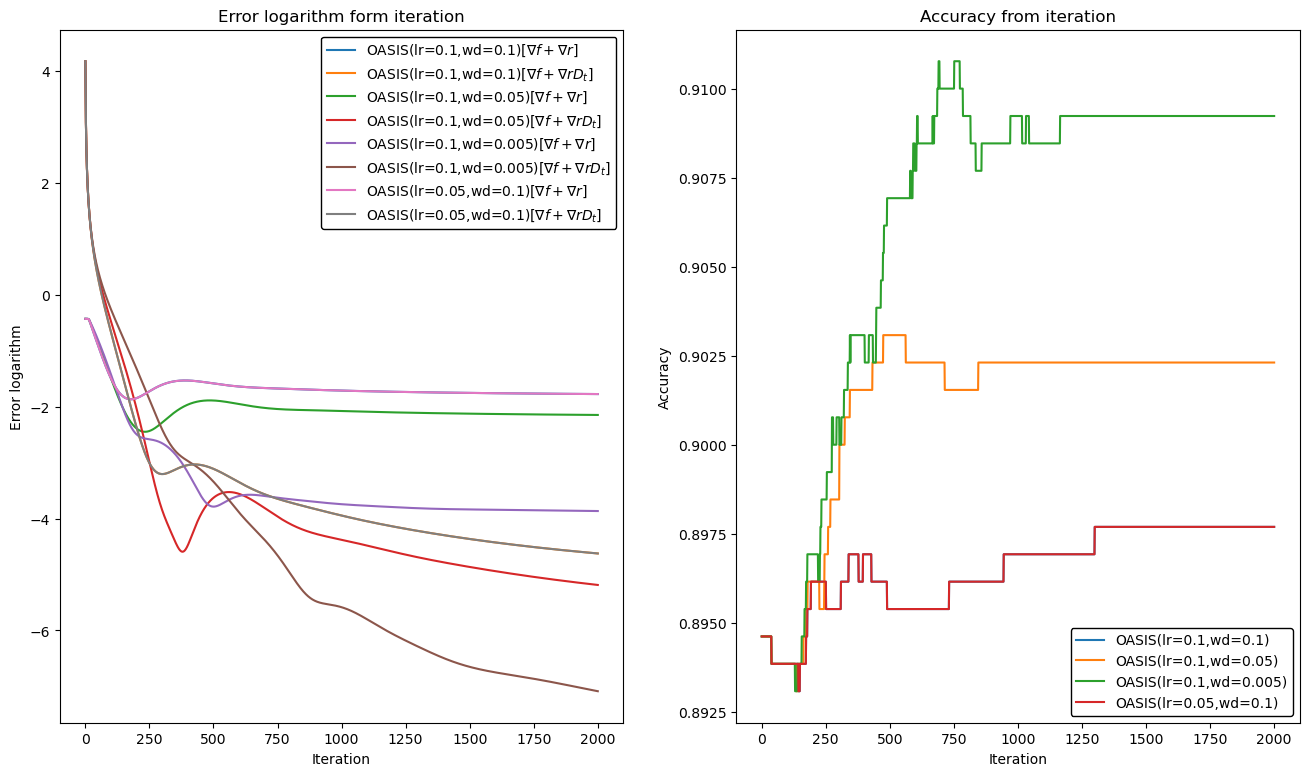

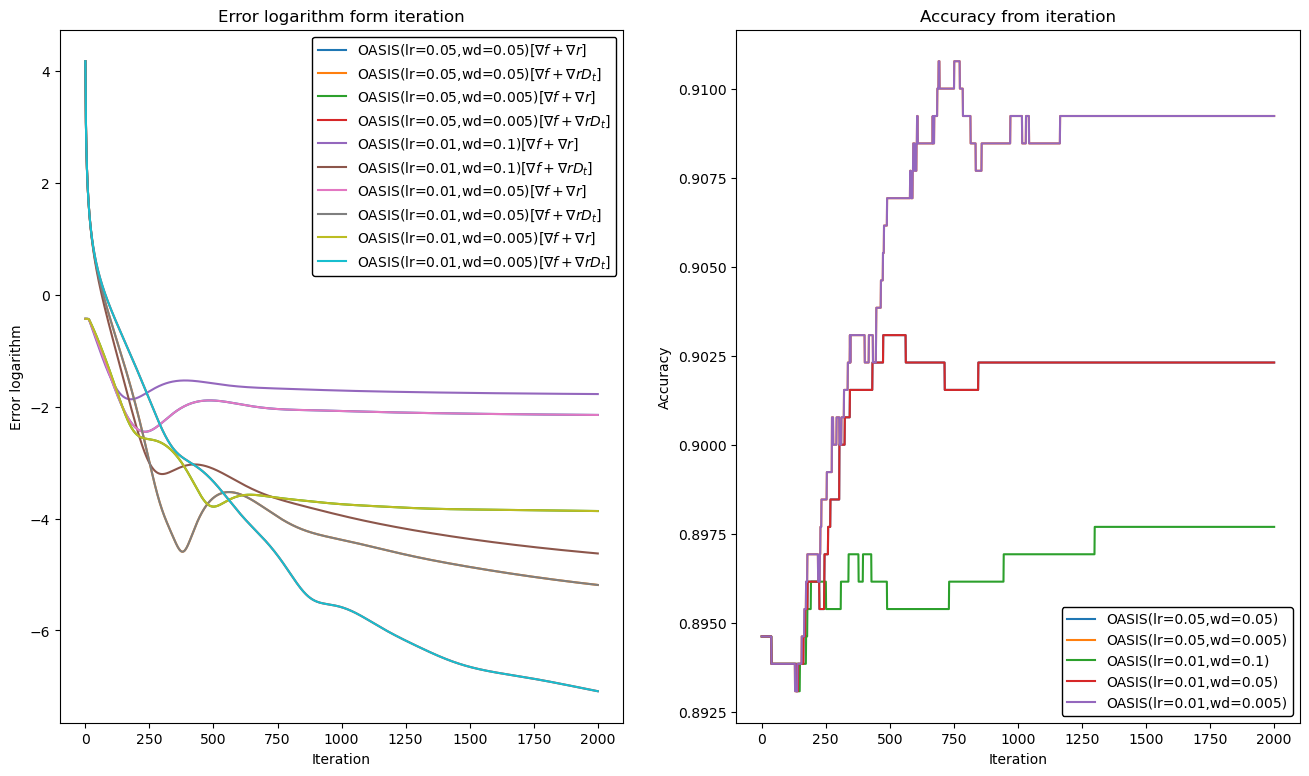

In [18]:
plot_models_acc_error2(wine_models[3][0:4], "")
plot_models_acc_error2(wine_models[3][4:], "")

In [26]:
print(wine_models[4][0]._label[:6])

AdamWH


In [30]:
for model in wine_models[4]:
    model._label =  model._label[:5] + 'H' + '('+ model._label[6:]

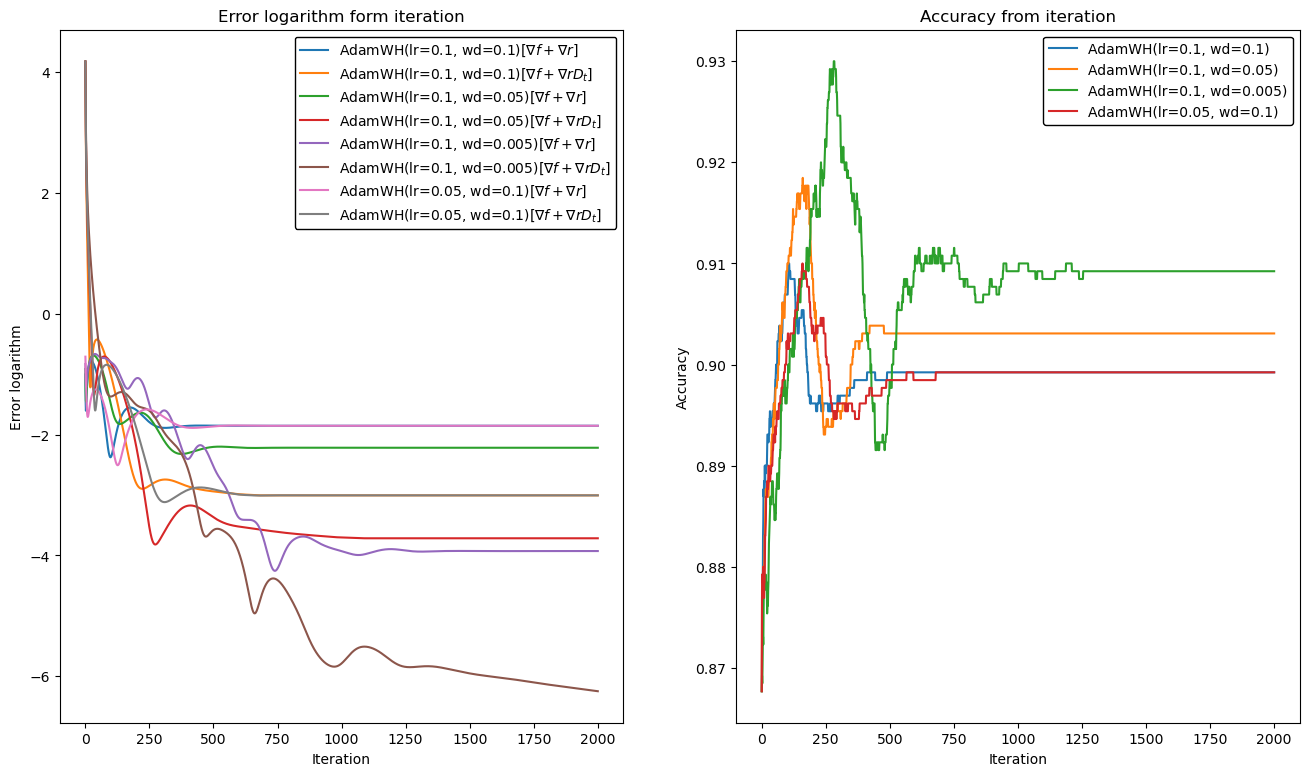

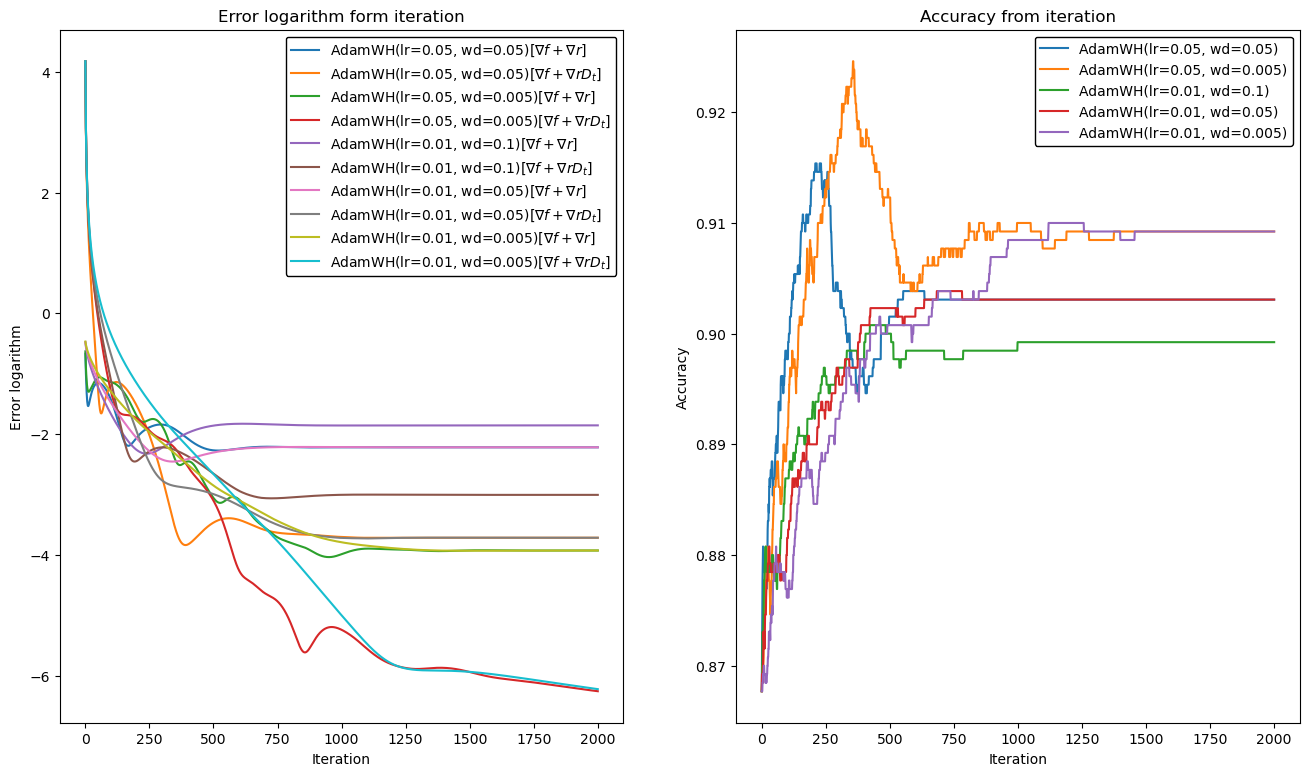

In [31]:
plot_models_acc_error2(wine_models[4][0:4], "")
plot_models_acc_error2(wine_models[4][4:], "")

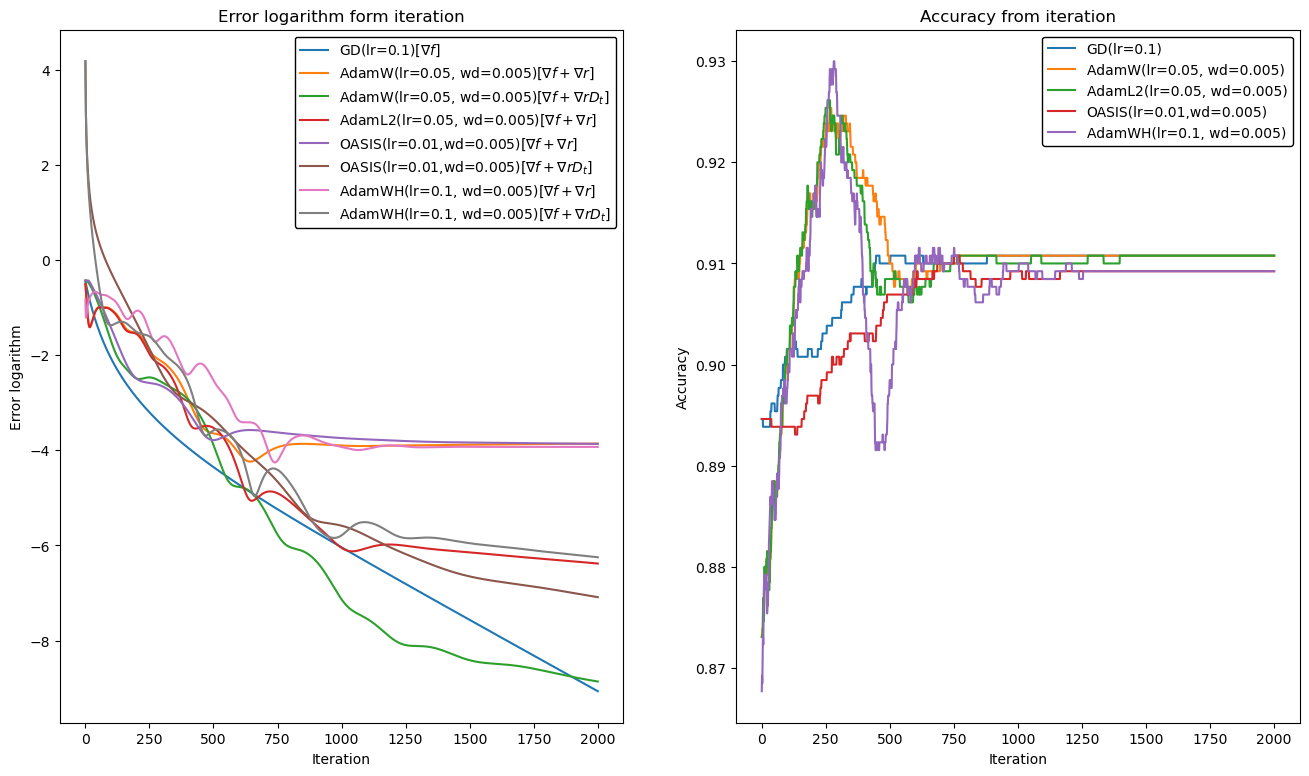

In [32]:
best_wine_models = [wine_models[0][0], wine_models[1][5], wine_models[2][5], wine_models[3][-1], wine_models[4][2]]
plot_models_acc_error2(best_wine_models, "")

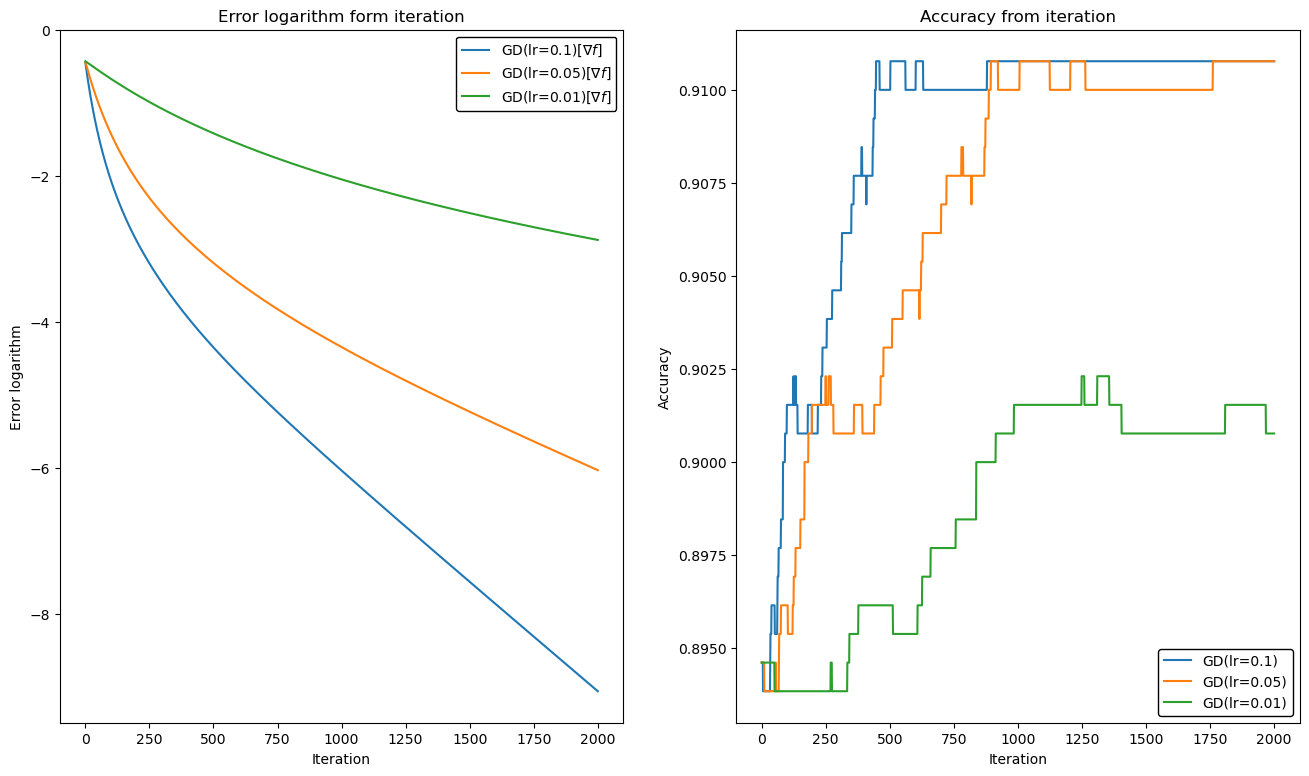

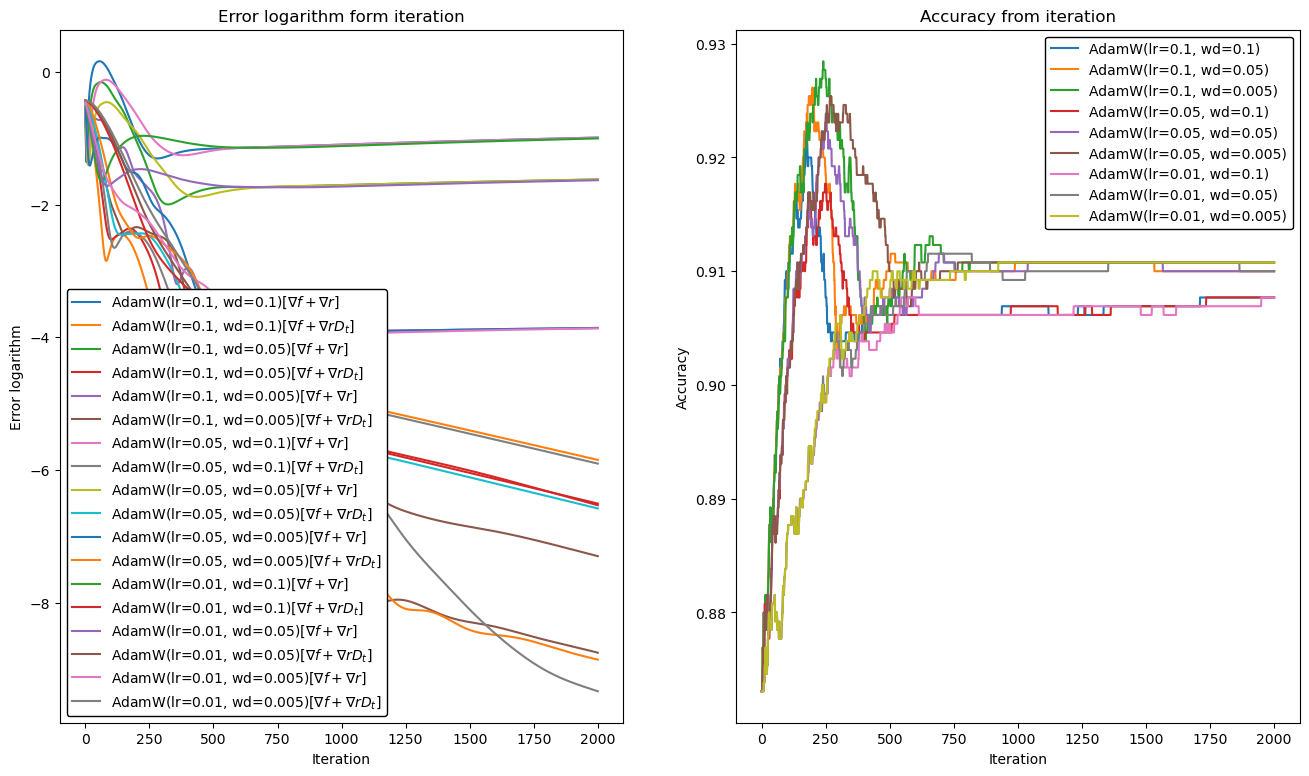

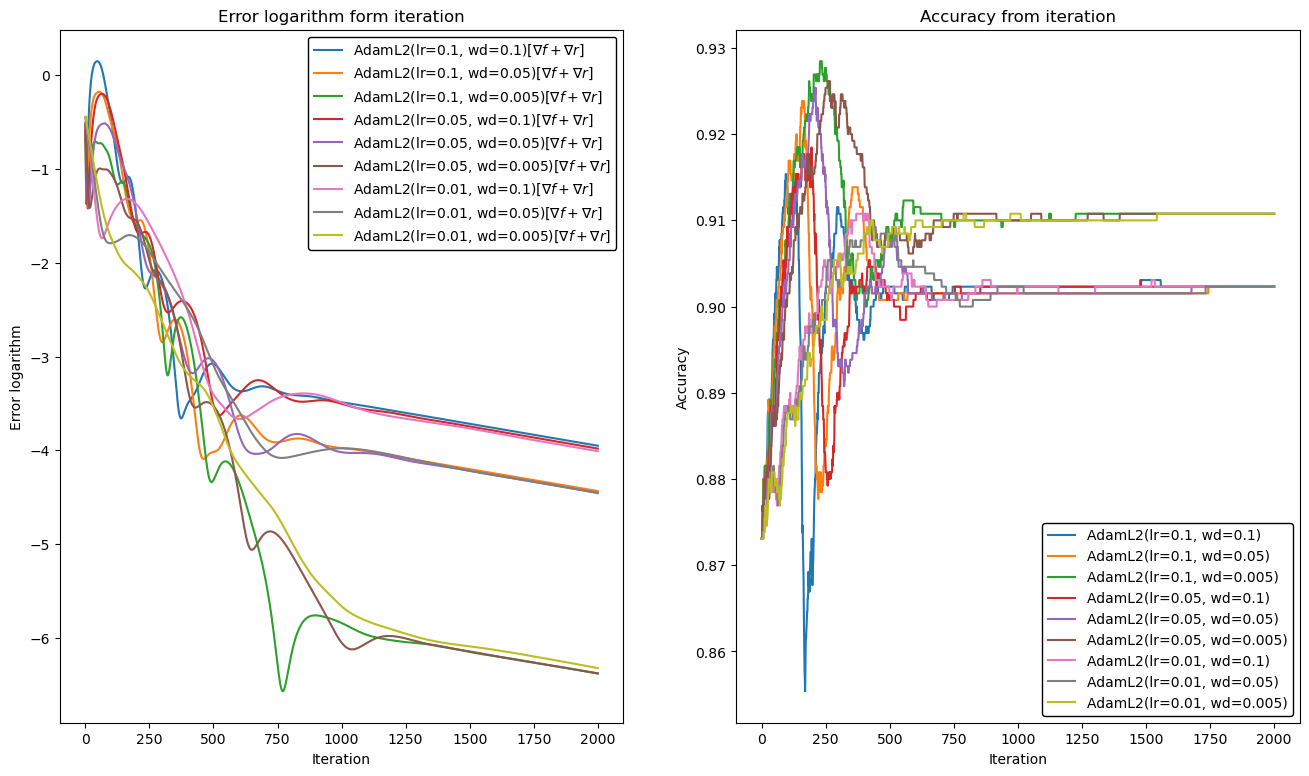

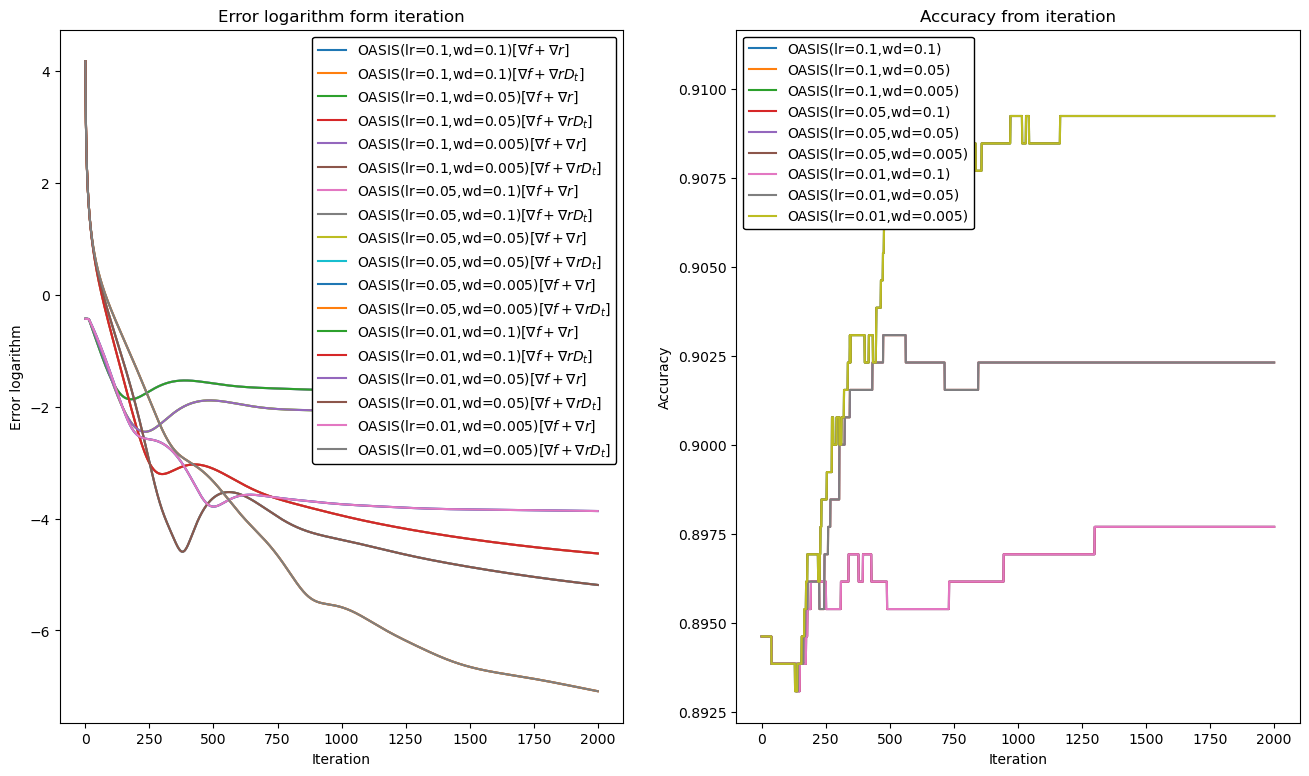

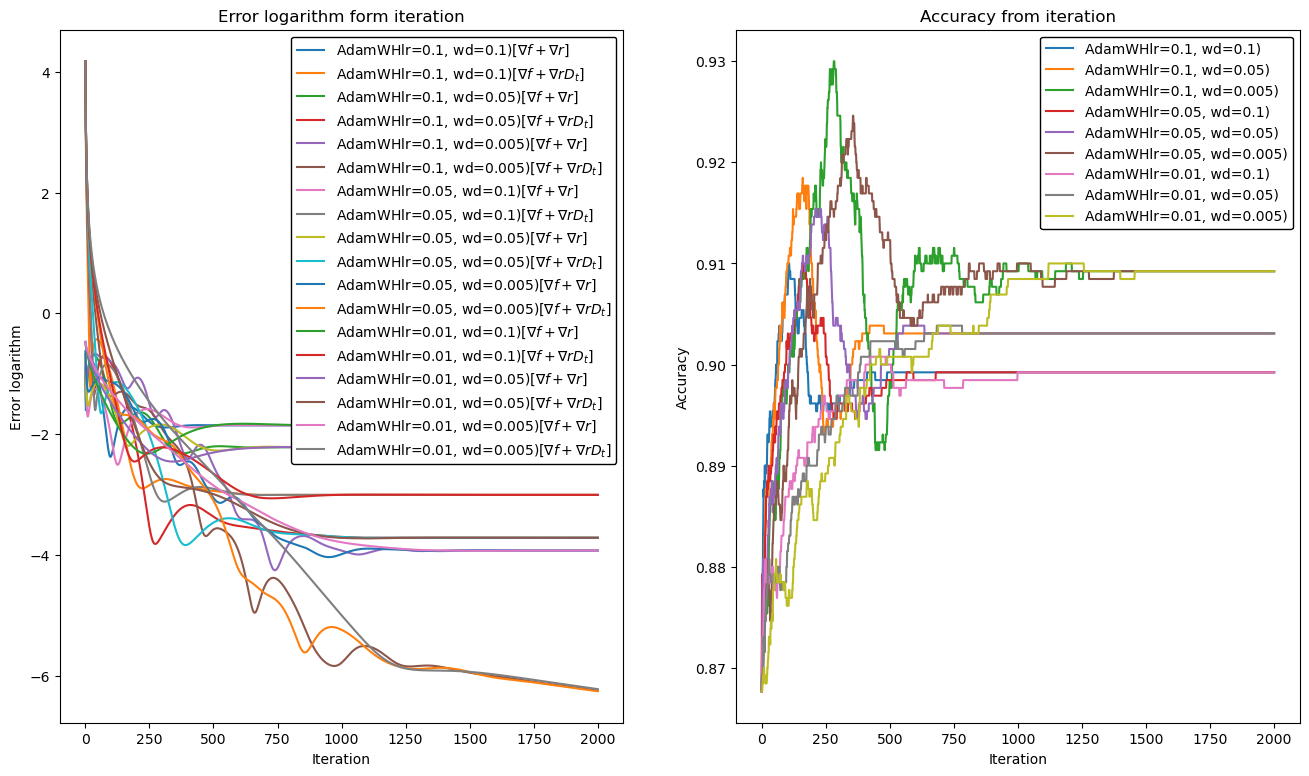

In [9]:
for model in wine_models:
    plot_models_acc_error2(model, "")

## Water probability

In [45]:
X_water, y_water = get_water_probability_dataset()
learning_rates = [0.001, 0.0005, 0.0001]
weight_decays = [0.001, 0.0005, 0.0001]
iter = 100
water_models = func_for_all(X_water, y_water, learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)

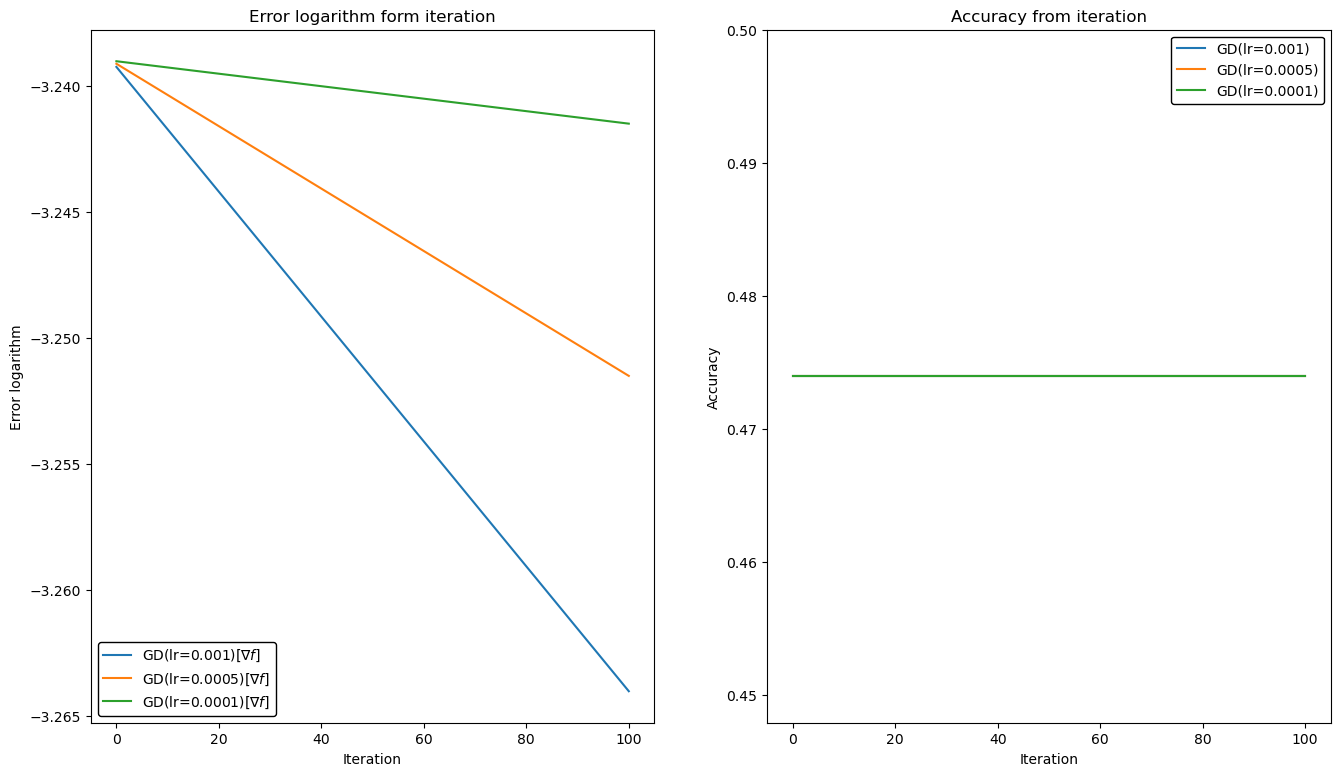

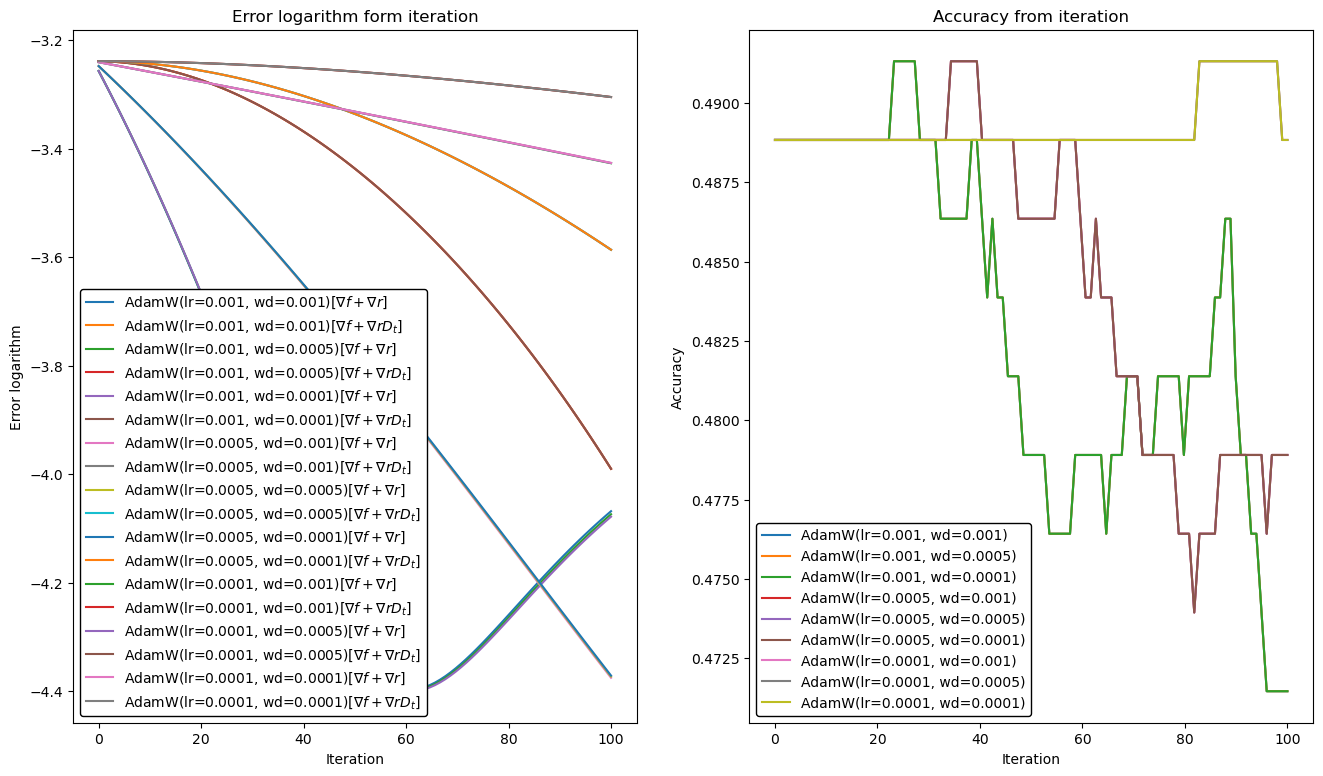

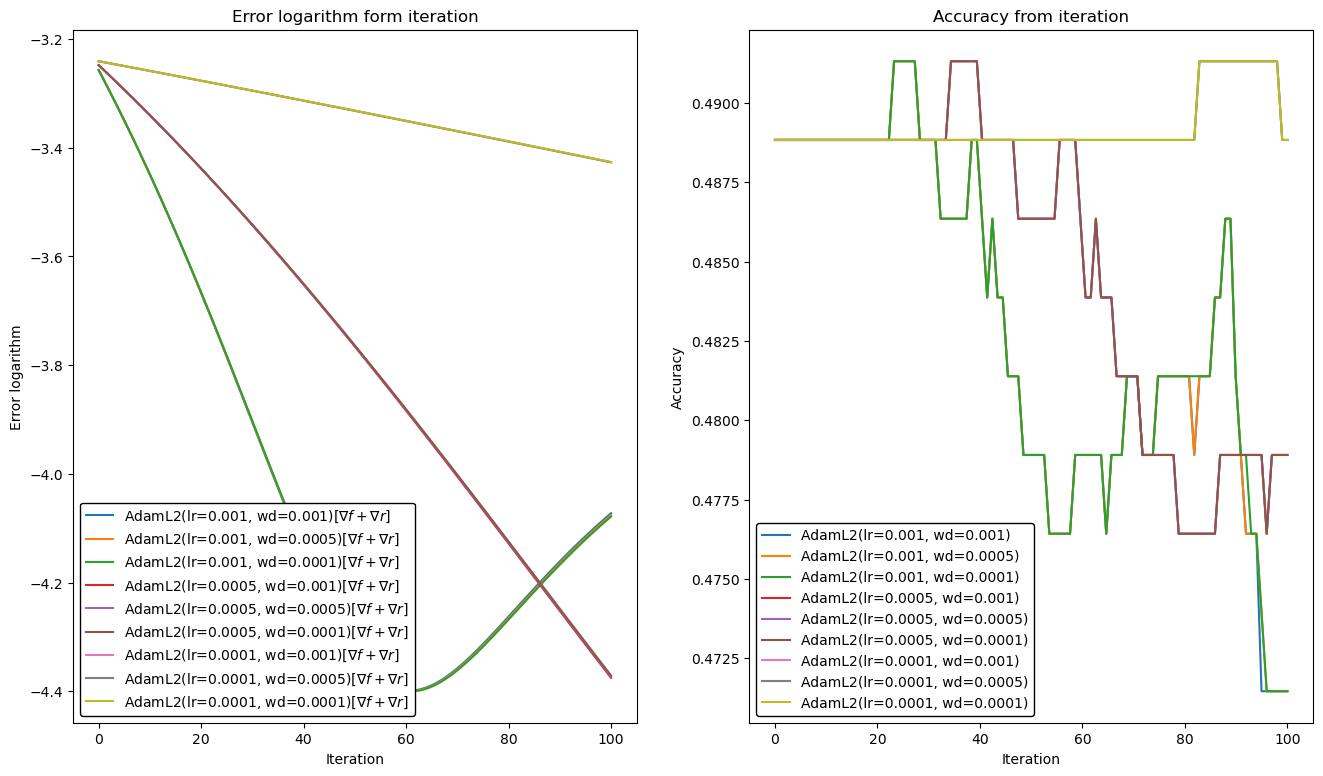

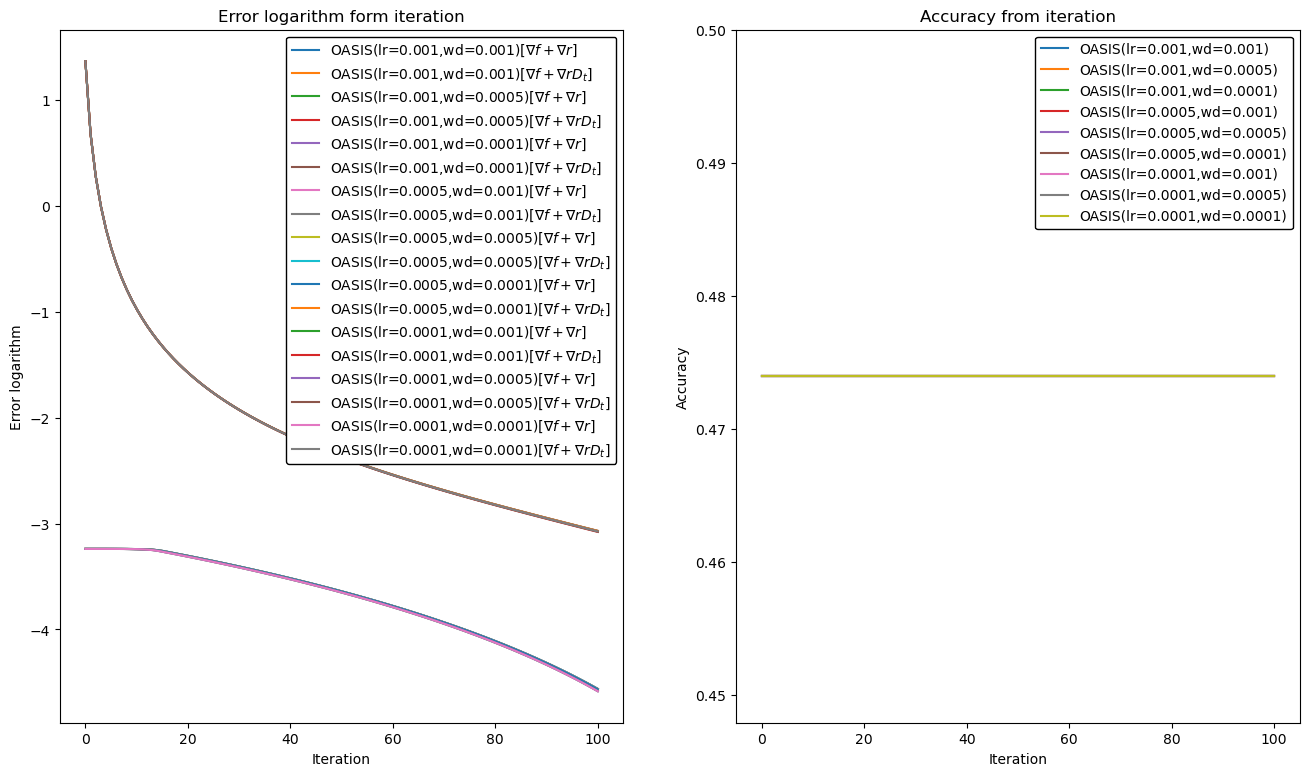

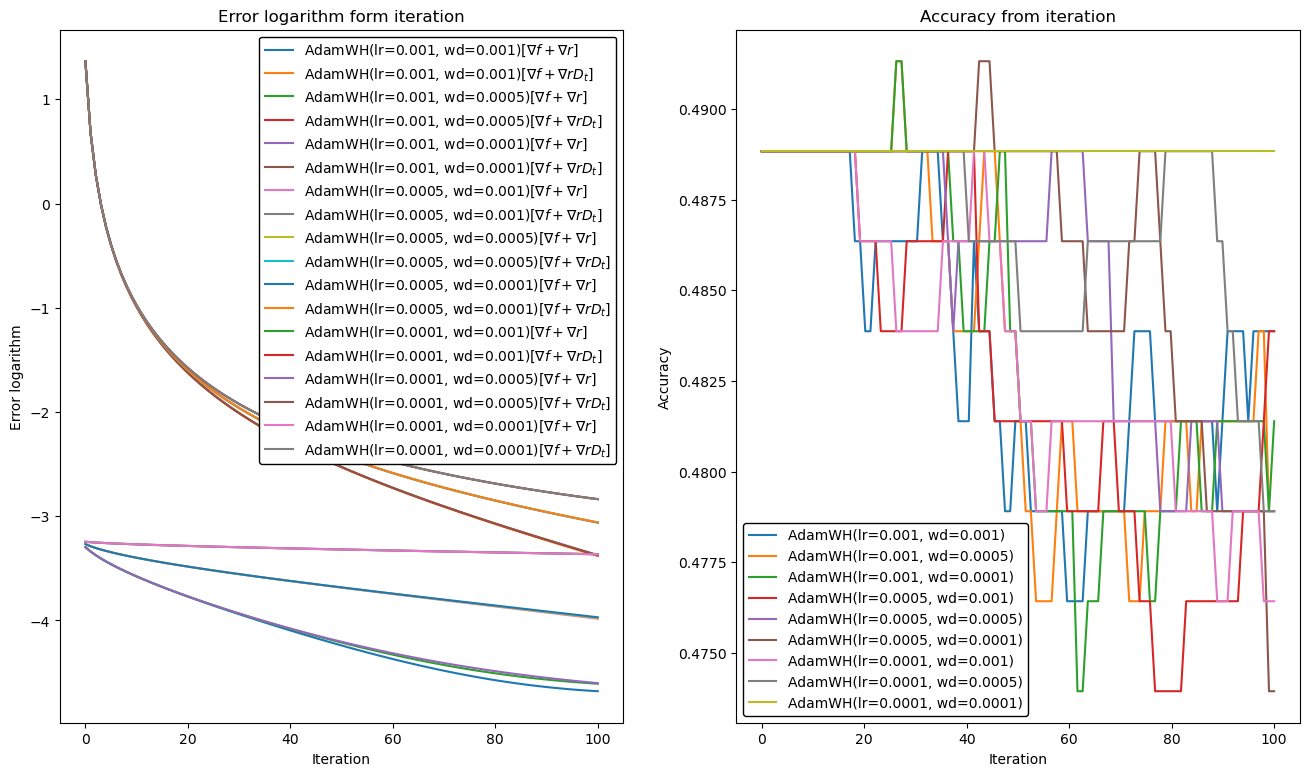

In [46]:
for model in water_models:
    plot_models_acc_error2(model, "")

## Diabete

In [9]:
X_diabete, y_diabete = get_diabete_dataset()
learning_rates = [0.1, 0.05, 0.01]
weight_decays = [0.1, 0.05, 0.005]\

iter = 2000
diabete_models = func_for_all(X_diabete, y_diabete, learning_rates=learning_rates, weight_decays=weight_decays, iter=iter)

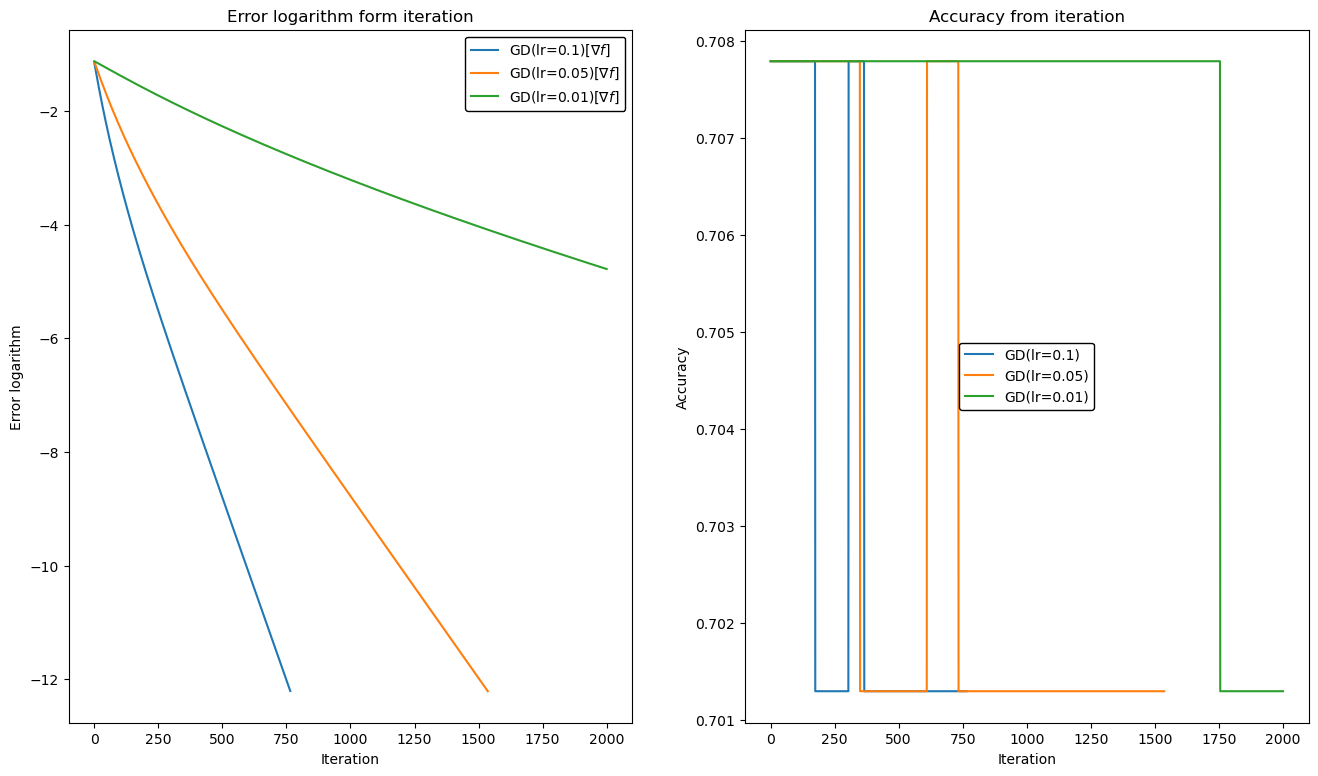

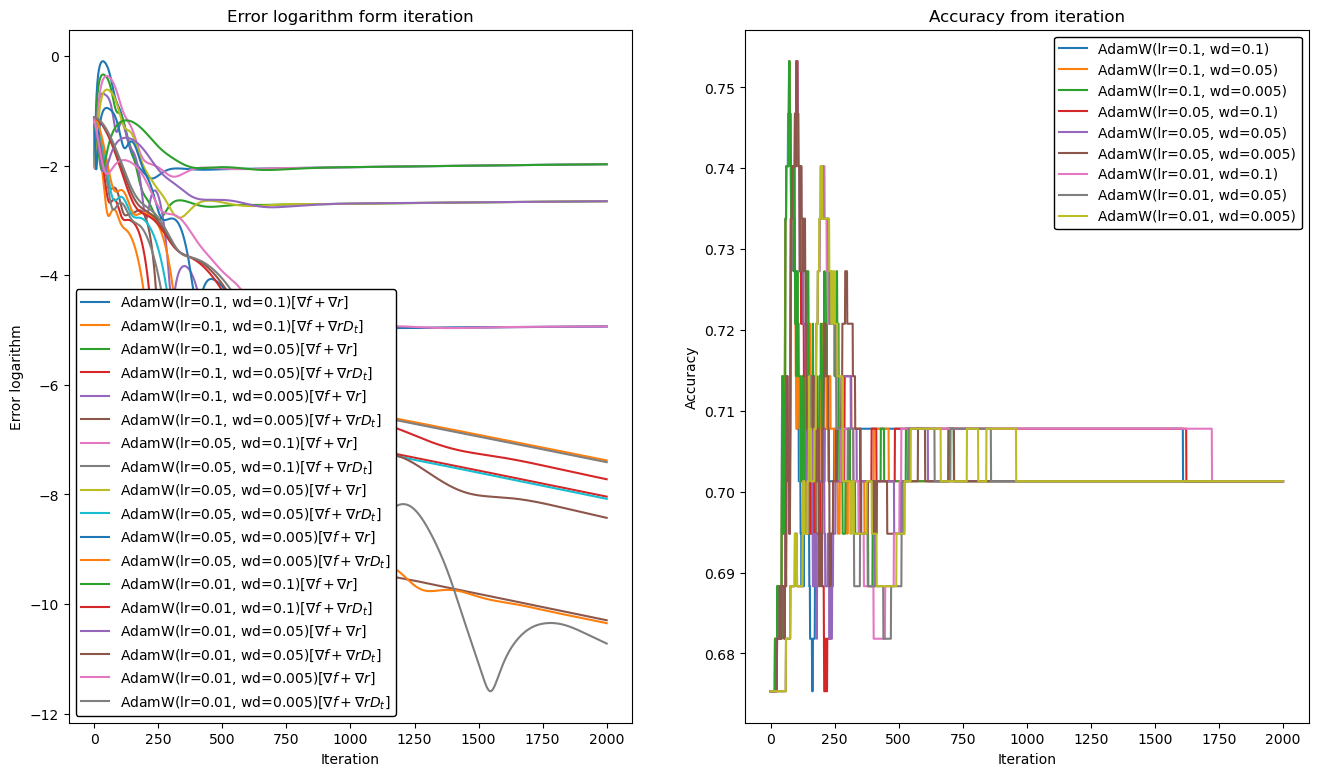

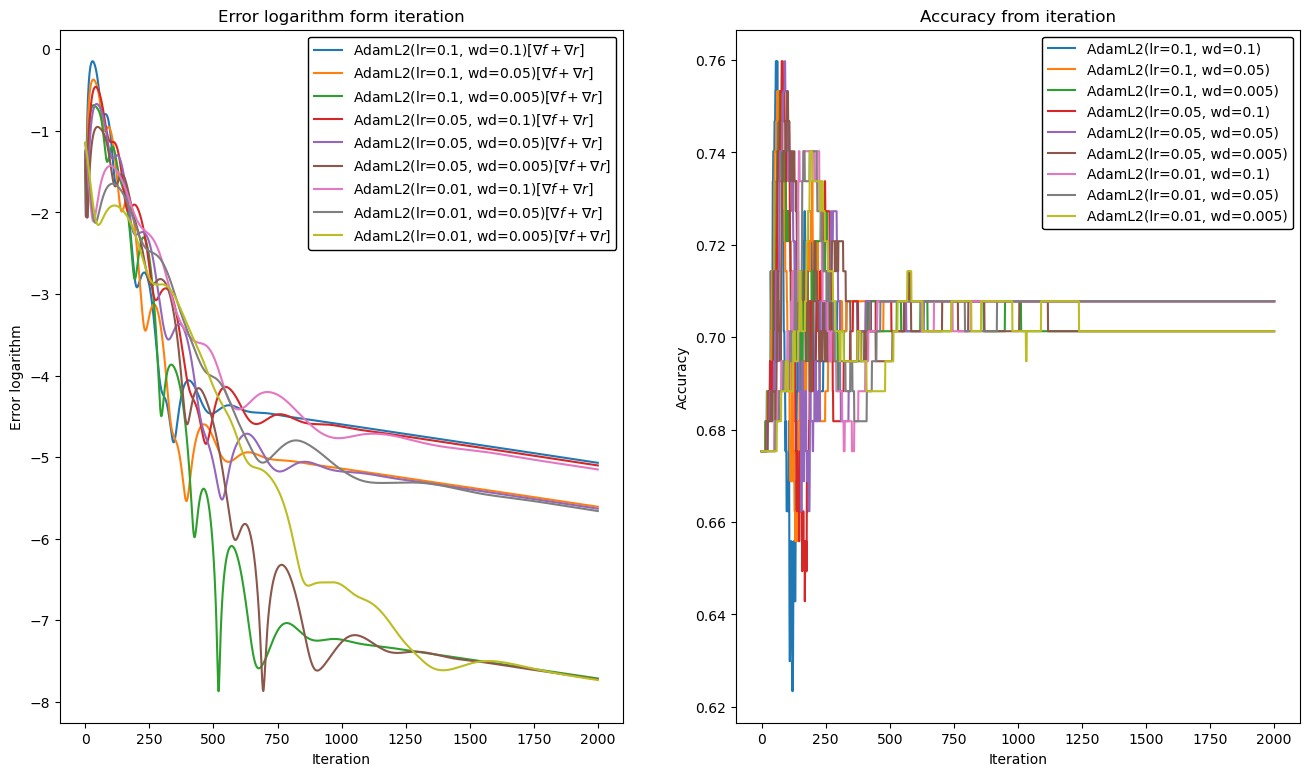

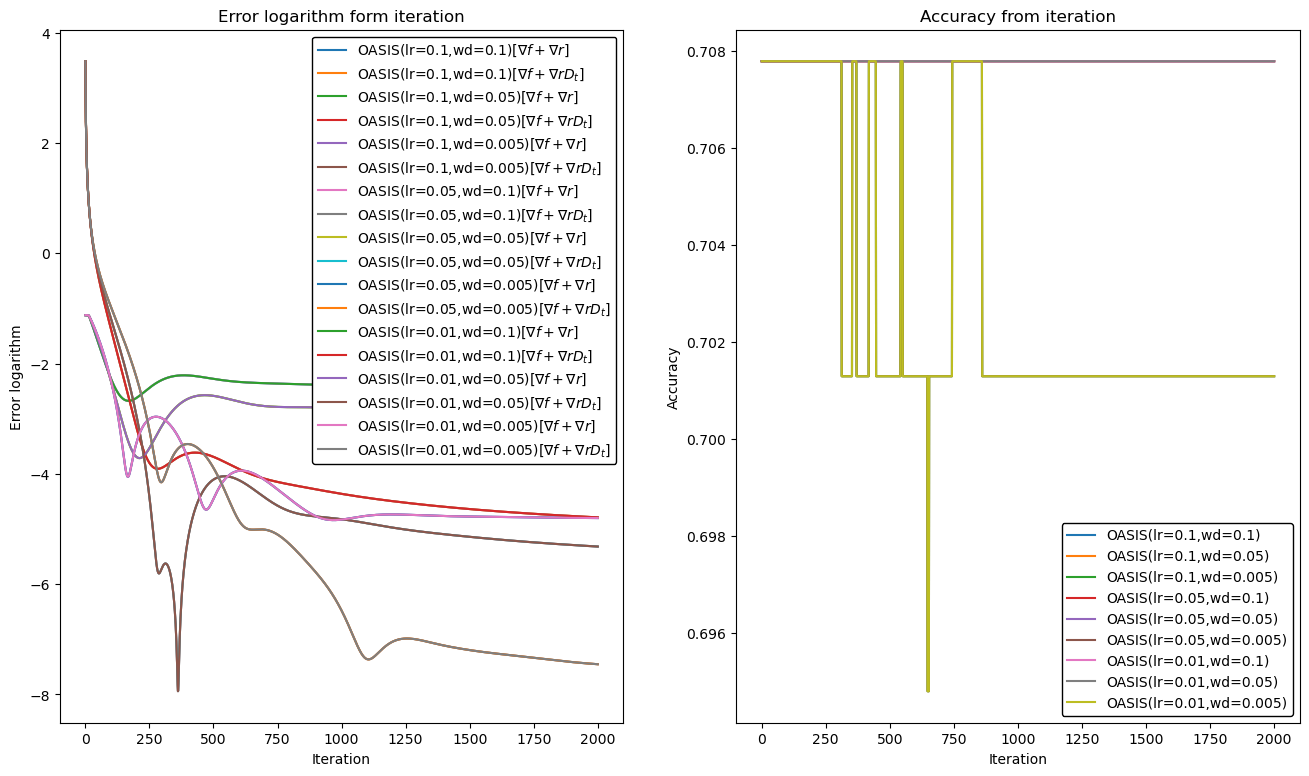

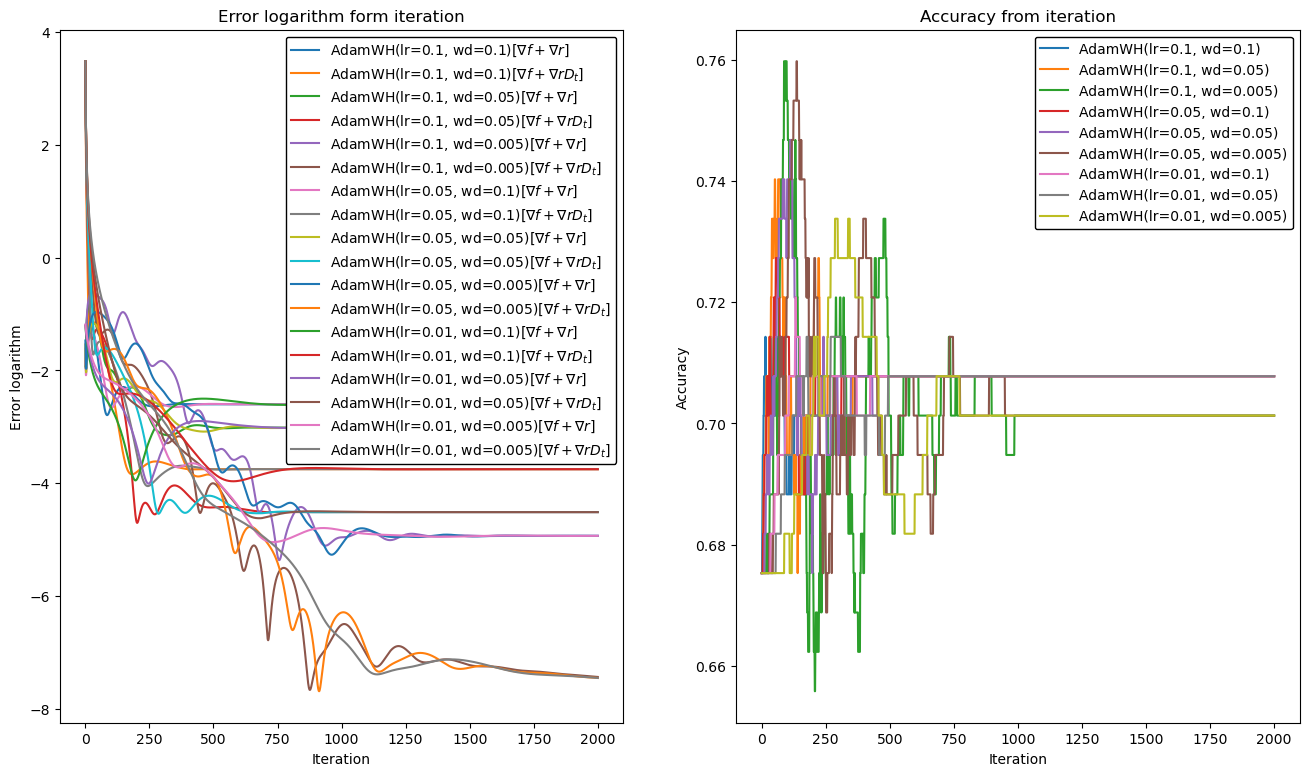

In [11]:
for model in diabete_models:
    plot_models_acc_error2(model, "")

## Scaling

In [ ]:
def get_processed_data(dataset_path, norm="l2", corrupt=None):
    X, y = get_data(dataset_path)
    if norm is not None:
        X = normalize(X, norm=norm, axis=1)
    if corrupt is not None:
        X = corrupt_scale(X, *corrupt)
    return X, y

def corrupt_scale(X, k_min=-3, k_max=3):
    bad_scale = 10**np.linspace(k_min, k_max, X.shape[1])
    np.random.shuffle(bad_scale)
    return X[:].multiply(bad_scale.reshape(1,-1)).tocsr()